# Powering the Future.

Climate change has motivated global leaders to accelerate the adoption of renewable energy sources. Over the past century, NextEra Energy has been at the forefront of America’s renewable energy initiatives, setting industry standards for operational excellence. This report explores how different regions worldwide are utilizing renewable resources, analyzing data related to energy production, innovation, economy, policies, social governance, and environmental impact.

## Table of Contents

1. Energy Metrics
2. Innovation & Tech
3. Economy & Policy
4. Social & Governance
5. Environment and Resources
6. Conclusion

In [19]:
# Libraries required for Loading the data and for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.float_format', '{:.2f}'.format)

In [20]:
# Loading the Data
df = pd.read_csv("data/nextera.csv")
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Energy Consumption,Energy Storage Capacity,Grid Integration Capability,Electricity Prices,Energy Subsidies,Proportion of Energy from Renewables,R&D Expenditure,Renewable Energy Patents,Innovation Index,GDP,Population,Government Policies,Renewable Energy Targets,Public-Private Partnerships in Energy,Energy Market Liberalization,Ease of Doing Business,Regulatory Quality,Political Stability,Control of Corruption,CO2 Emissions,Average Annual Temperature,Solar Irradiance,Wind Speed,Hydro Potential,Biomass Availability
0,Canada,2012,Hydro,99925.06,26824.44,3439819648.00,743320.10,523.23,0.76,0.14,345335368.70,96.68,4213886246.00,421,27.29,31625827987332,481876601,0,0,0,1,8.45,0.84,3.12,0.51,387603.46,4.37,230.05,8.34,23.55,15.21
1,Brazil,2016,Solar,89553.35,5021.22,230691116.50,755329.78,595.36,0.34,0.12,518123314.40,83.43,2819583627.00,818,81.20,102797607167595,1336318209,0,1,1,1,15.29,0.42,7.69,7.12,764702.08,-7.24,101.63,2.76,93.22,64.56
2,France,2002,Hydro,18200.05,33611.58,7337585412.00,302879.87,423.23,0.35,0.11,844838068.90,50.65,7177794816.00,632,66.60,25395194643740,677070231,1,1,1,0,42.58,5.80,3.20,1.19,74699.24,11.16,188.69,12.03,24.64,56.52
3,Brazil,2014,Solar,82593.10,30016.24,4158375371.39,273895.44,35.01,0.43,0.20,366810840.04,29.76,7847293789.02,875,43.81,34418288673773,1422504982,0,1,1,1,54.43,7.49,3.51,1.28,87442.61,14.80,132.90,4.78,66.96,13.43
4,Australia,2015,Biomass,15042.90,12148.93,9426153986.00,465093.51,874.58,0.61,0.17,726199983.90,71.53,7480487992.00,358,61.46,176196615072280,815611375,0,1,1,1,97.26,5.90,4.90,4.13,627278.82,31.29,210.52,3.12,36.36,41.68


### Let's take a look at our data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                2400 non-null   object 
 1   Year                                   2400 non-null   int64  
 2   Energy Type                            2400 non-null   object 
 3   Production (GWh)                       2400 non-null   float64
 4   Installed Capacity (MW)                2400 non-null   float64
 5   Investments (USD)                      2400 non-null   float64
 6   Energy Consumption                     2400 non-null   float64
 7   Energy Storage Capacity                2400 non-null   float64
 8   Grid Integration Capability            2400 non-null   float64
 9   Electricity Prices                     2400 non-null   float64
 10  Energy Subsidies                       2400 non-null   float64
 11  Prop

No null values and correct data types. Let's replace spaces in column names with underscores and check the number of occurences of each country in the dataset.

In [22]:
# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Get the value counts for the 'Country' column
country_counts = df['Country'].value_counts()
country_counts

Country
France       278
China        252
India        246
Brazil       238
Japan        232
Canada       230
Germany      230
USA          228
Australia    222
Russia       200
UK            44
Name: count, dtype: int64

All countries except UK have similar number of occurences. Since we are only exploring the data in this notebook, we don't need to perform data balancing. In the following exploratory data analysis, mean() function will be used to take into account of UK's performance alongside other countries.

Let's look at how countries making use of different types of renewable energy.

In [23]:
# Group by Country and Energy_Type, then count occurrences
energy_distribution = df.groupby(['Country', 'Energy_Type']).size().unstack(fill_value=0)
energy_distribution.loc['Column_Total']= energy_distribution.sum(numeric_only=True, axis=0)

# Display the result
pd.DataFrame(energy_distribution)

Energy_Type,Biomass,Geothermal,Hydro,Solar,Wind
Country,,,,,
Australia,46,57,45,37,37
Brazil,39,45,56,51,47
Canada,46,51,53,43,37
China,53,54,44,45,56
France,62,52,48,57,59
Germany,48,46,53,40,43
India,44,53,45,42,62
Japan,50,41,46,45,50
Russia,39,40,40,51,30


Over the 23-year period from 2000 to 2023, Australia primarily utilized Geothermal energy; Brazil, Canada, and Germany utilized Hydro; China and India utilized Wind; France and the UK focused on Biomass; Japan relied on both Biomass and Wind; while Russia and the USA mainly used Solar energy. 

Let's check some other energy metrics.

## 1. Energy Metrics

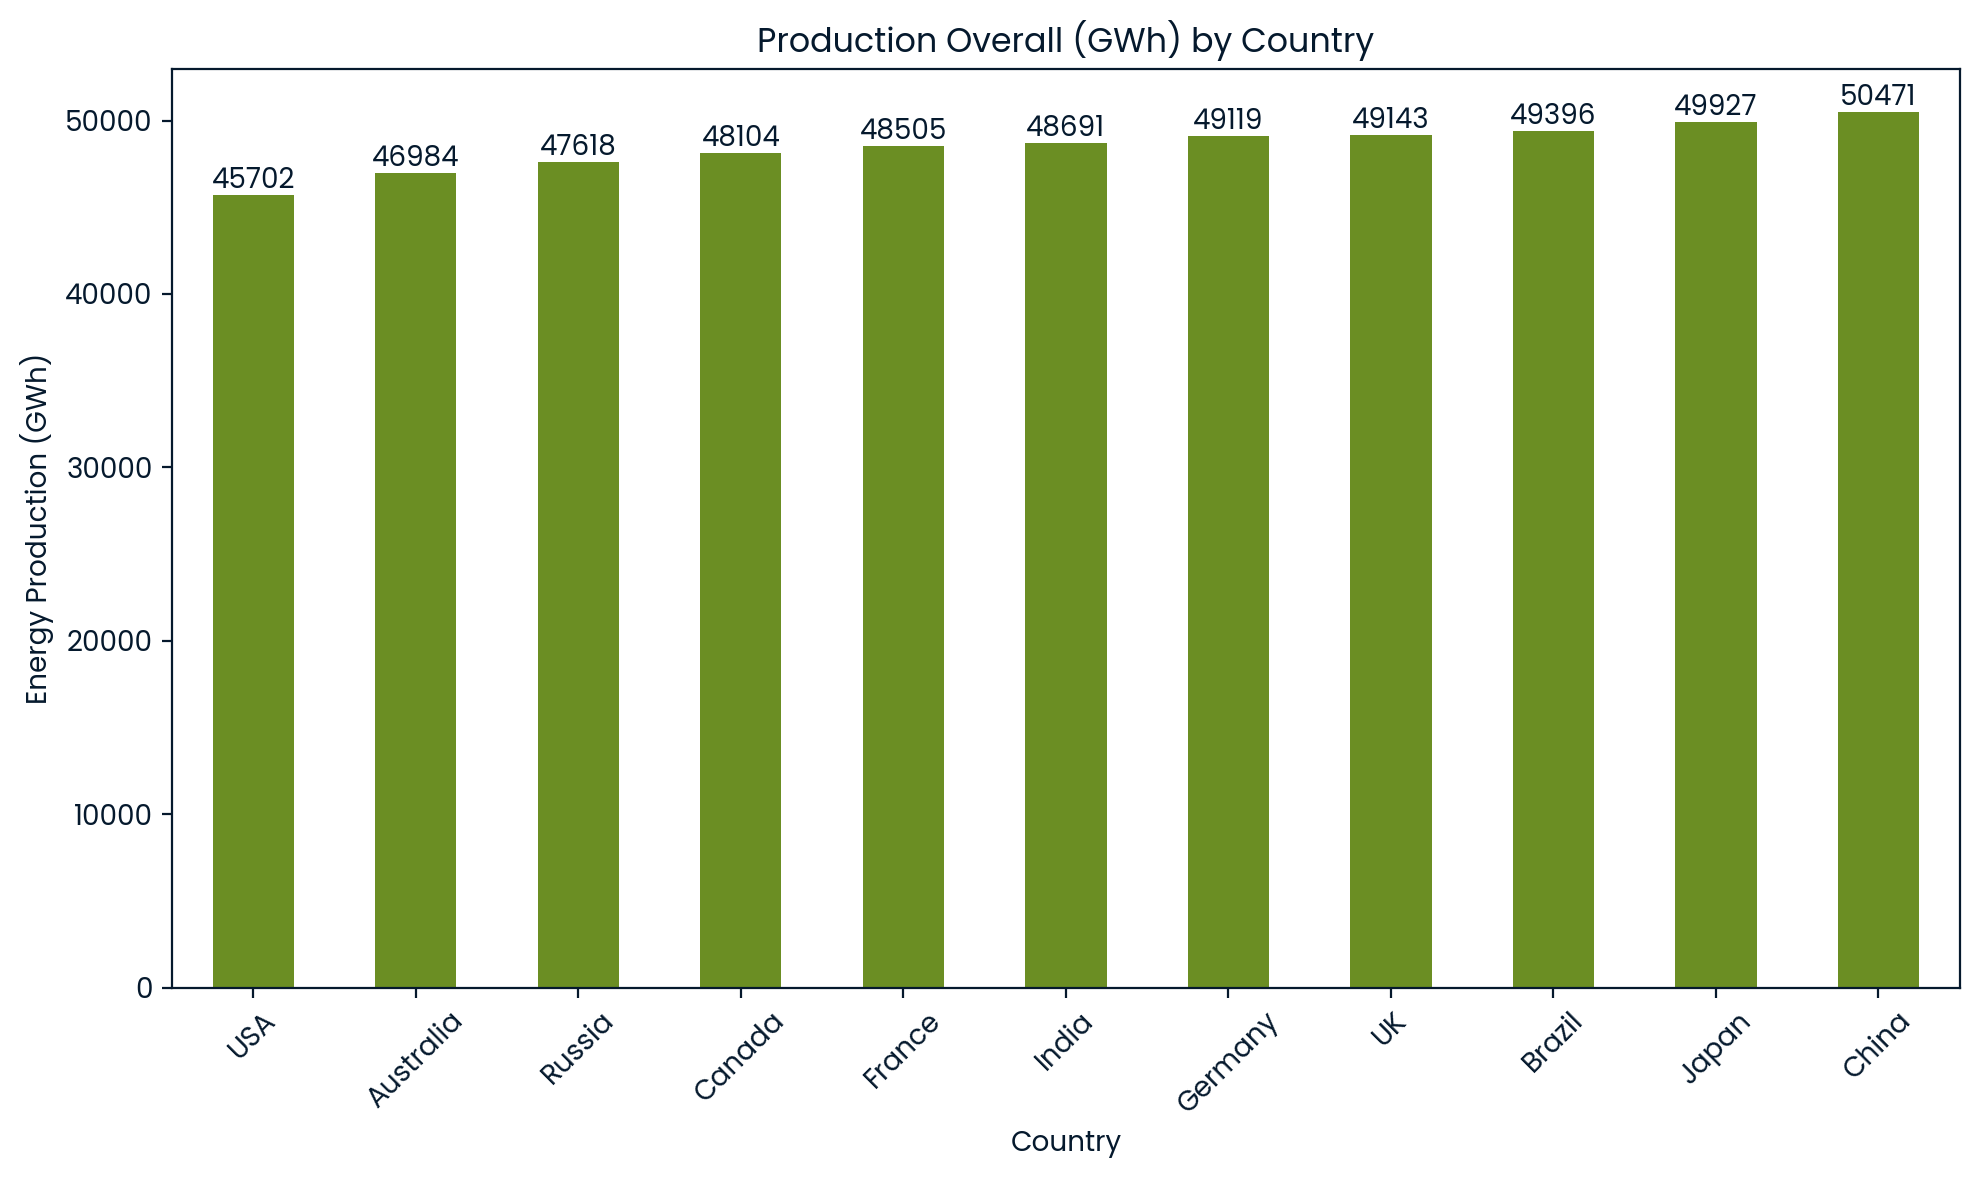

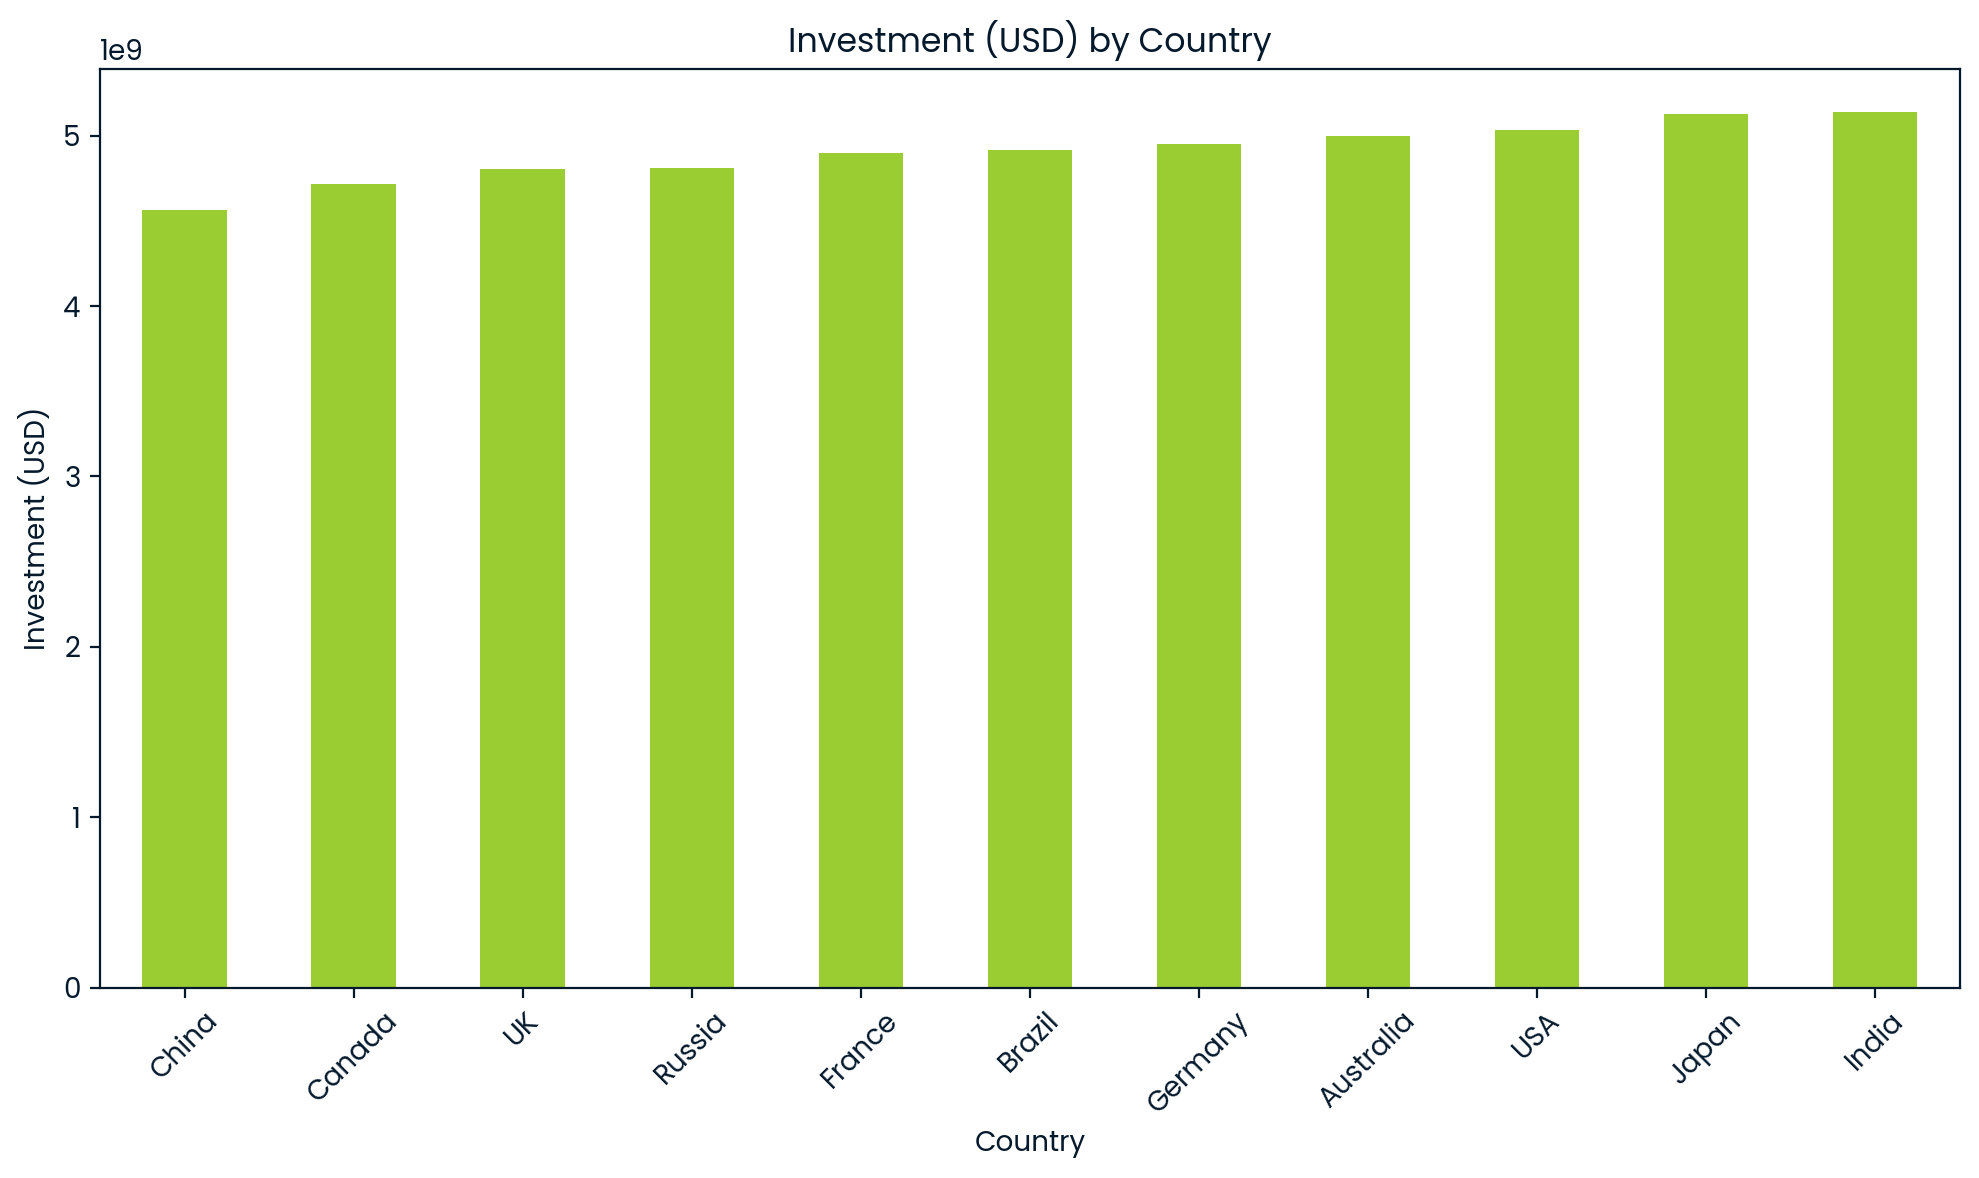

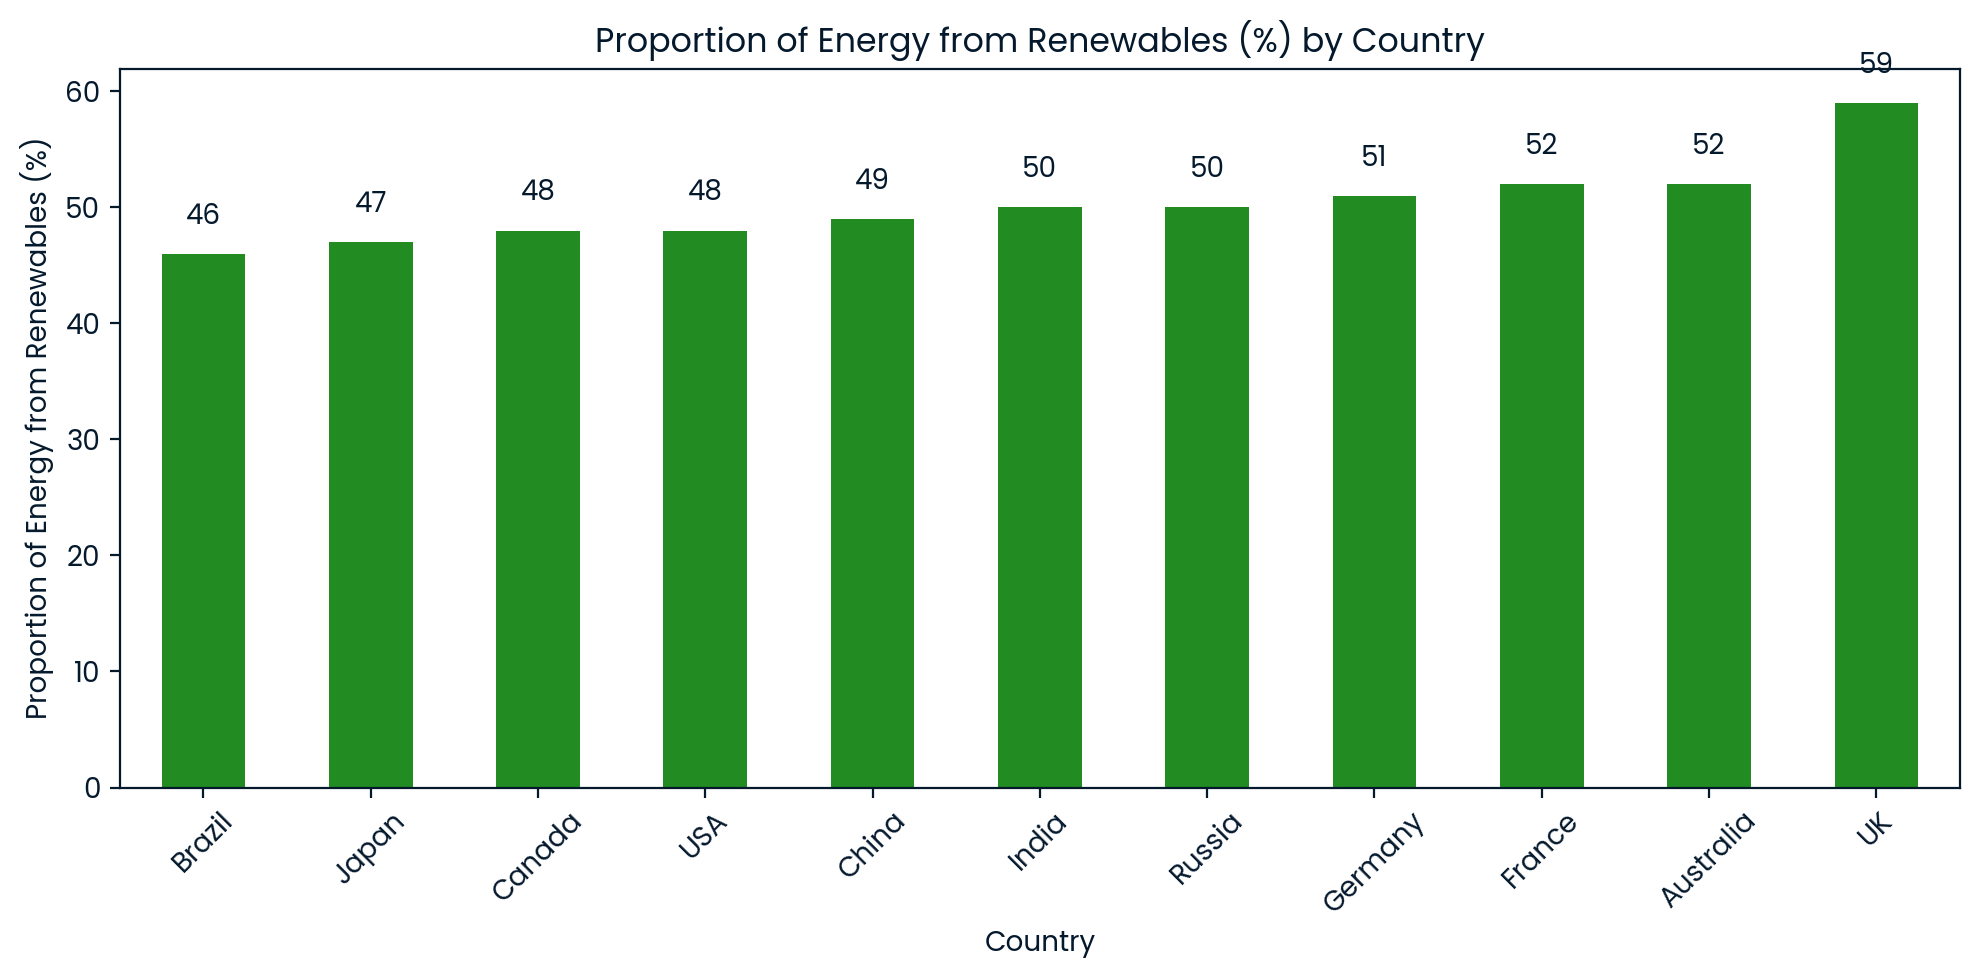

In [30]:
# Average Renewable Energy Production in GWh
# Group by 'Country' and average the 'Production (GWh)'
df_production = df.groupby('Country', as_index=False)['Production_(GWh)'].mean()
df_production['Production_(GWh)'] = df_production['Production_(GWh)'].round(0).astype(int)
df_production = df_production.sort_values('Production_(GWh)', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_production)

# Set up the plot
ax = df_production.plot(kind='bar', x='Country', y='Production_(GWh)', figsize=(10, 6), legend=False, color='olivedrab')

# Add value labels on top of the bars
for i, val in enumerate(df_production['Production_(GWh)']):
    ax.text(i, val + 2, str(val), ha='center', va='bottom')

# Customize the plot
plt.ylabel('Energy Production (GWh)')
plt.title('Production Overall (GWh) by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###################################################################################
# Average Investments (USD)
# Group by 'Country' and average the 'Investments_(USD)	'
df_inv = df.groupby('Country', as_index=False)['Investments_(USD)'].mean()
df_inv = df_inv.sort_values('Investments_(USD)', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_inv)

# Set up the plot
ax = df_inv.plot(kind='bar', x='Country', y='Investments_(USD)', figsize=(10, 6), legend=False, color='yellowgreen')

# Customize the plot
plt.ylabel('Investment (USD)')
plt.title('Investment (USD) by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###################################################################################
# Average Proportion of Renewables
# Group by 'Country' and average the 'Proportion_of_Energy_from_Renewables'
df_propren = df.groupby('Country', as_index=False)['Proportion_of_Energy_from_Renewables'].mean()
df_propren = df_propren.sort_values('Proportion_of_Energy_from_Renewables', ascending=True)
df_propren['Proportion_of_Energy_from_Renewables'] = df_propren['Proportion_of_Energy_from_Renewables'].round(0).astype(int)
# Display the resulting DataFrame
pd.DataFrame(df_propren)

# Set up the plot
ax = df_propren.plot(kind='bar', x='Country', y='Proportion_of_Energy_from_Renewables', figsize=(10, 5), legend=False, color='forestgreen')

# Add value labels on top of the bars
for i, val in enumerate(df_propren['Proportion_of_Energy_from_Renewables']):
    ax.text(i, val + 2, str(val), ha='center', va='bottom')

# Customize the plot
plt.ylabel('Proportion of Energy from Renewables (%)')
plt.title('Proportion of Energy from Renewables (%) by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Despite high investments in the USA and Australia, their renewable energy production remains comparatively low—possibly indicating inefficiencies or different strategic priorities.

Even though USA and China are similar in land size, China produced a lot more renewable energy than USA. While China invested the least, it was the country who produced the most.

The UK leads with renewables constituting approximately 60% of its energy mix, indicating a highly renewable-dependent energy sector.

## 2. Innovation & Tech

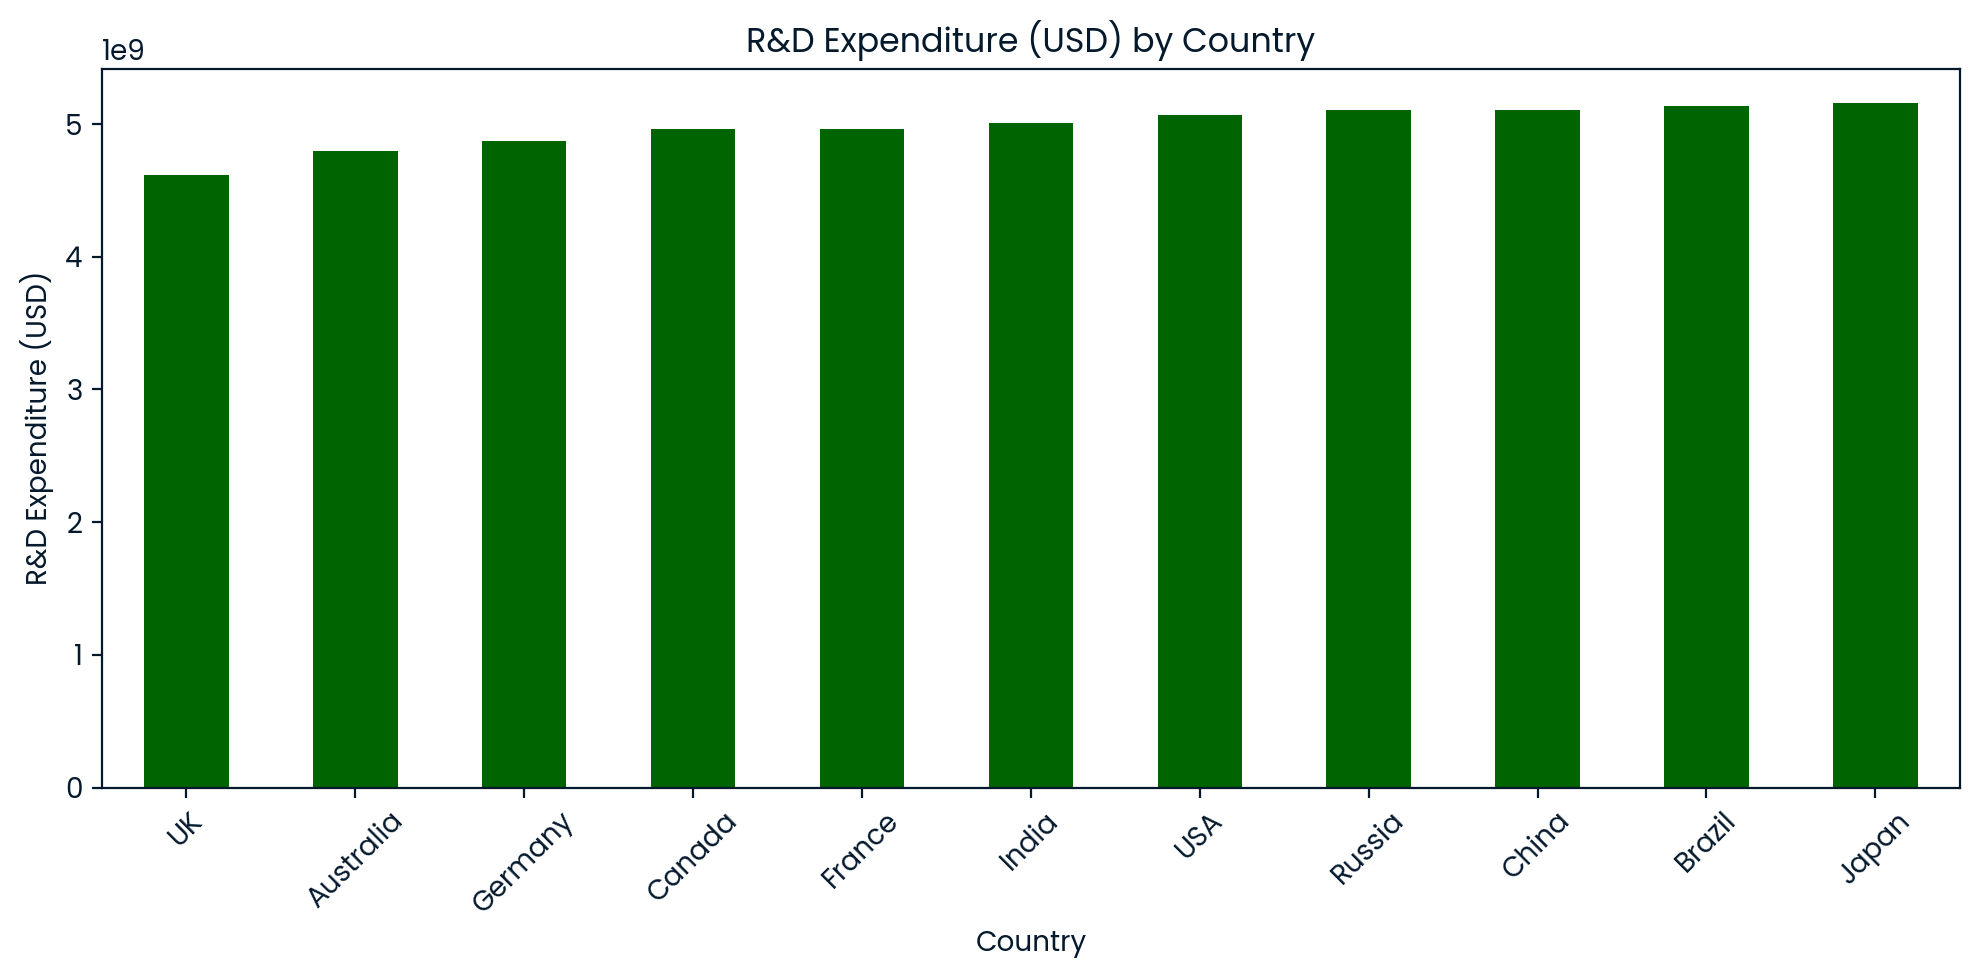

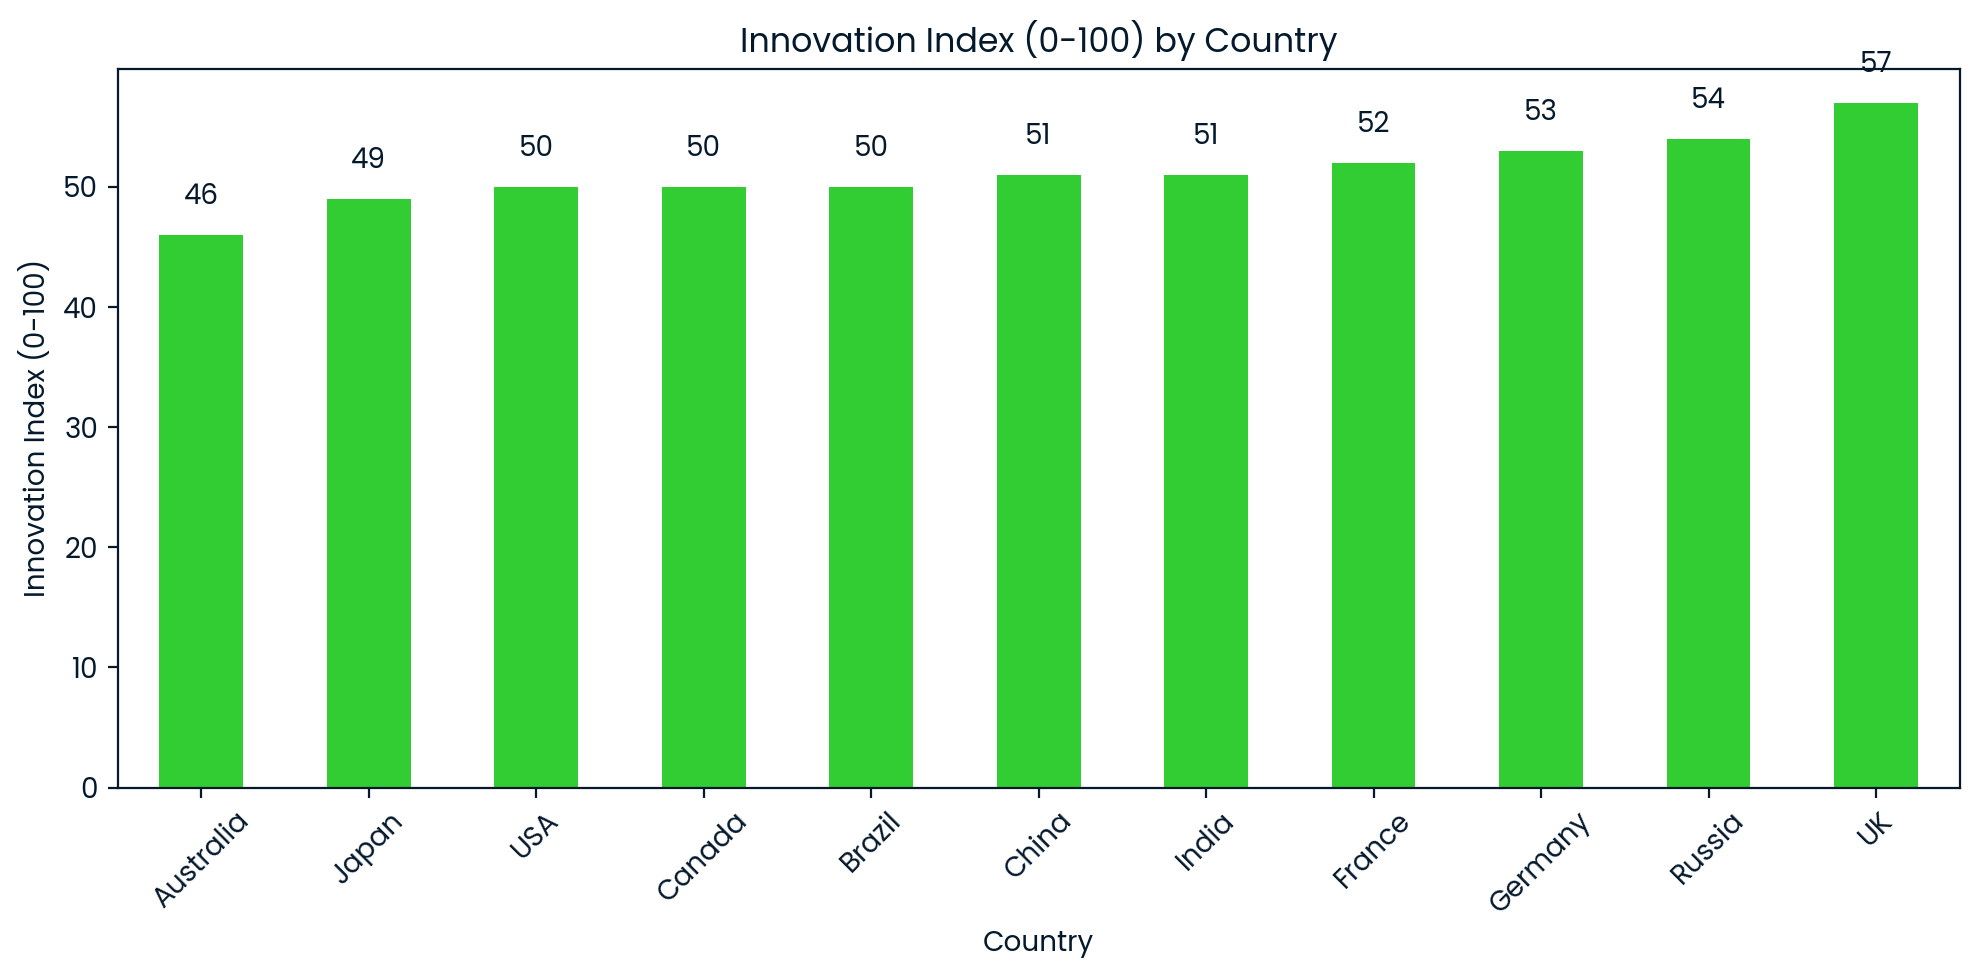

In [31]:
#R&D Expenditure (USD)
# Group by 'Country' and average the 'R&D_Expenditure'
df_rnd = df.groupby('Country', as_index=False)['R&D_Expenditure'].mean()
df_rnd = df_rnd.sort_values('R&D_Expenditure', ascending=True)
# Display the resulting DataFrame
pd.DataFrame(df_rnd)

# Set up the plot
ax = df_rnd.plot(kind='bar', x='Country', y='R&D_Expenditure', figsize=(10, 5), legend=False, color='darkgreen')


# Customize the plot
plt.ylabel('R&D Expenditure (USD)')
plt.title('R&D Expenditure (USD) by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##########################################################################
#Innovation Index
# Group by 'Country' and average the 'Innovation_Index	'
df_indx = df.groupby('Country', as_index=False)['Innovation_Index'].mean()
df_indx = df_indx.sort_values('Innovation_Index', ascending=True)
df_indx['Innovation_Index'] = df_indx['Innovation_Index'].round(0).astype(int)
# Display the resulting DataFrame
pd.DataFrame(df_indx)

# Set up the plot
ax = df_indx.plot(kind='bar', x='Country', y='Innovation_Index', figsize=(10, 5), legend=False, color='limegreen')

# Add value labels on top of the bars
for i, val in enumerate(df_indx['Innovation_Index']):
    ax.text(i, val + 2, str(val), ha='center', va='bottom')

# Customize the plot
plt.ylabel('Innovation Index (0-100)')
plt.title('Innovation Index (0-100) by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The UK demonstrates high efficiency in innovation, achieving the highest innovation index despite minimal R&D expenditure. Conversely, Australia invests heavily in R&D but scores lower on innovation, implying potential issues in translating investments into technological progress. 

## 3. Economy & Policy

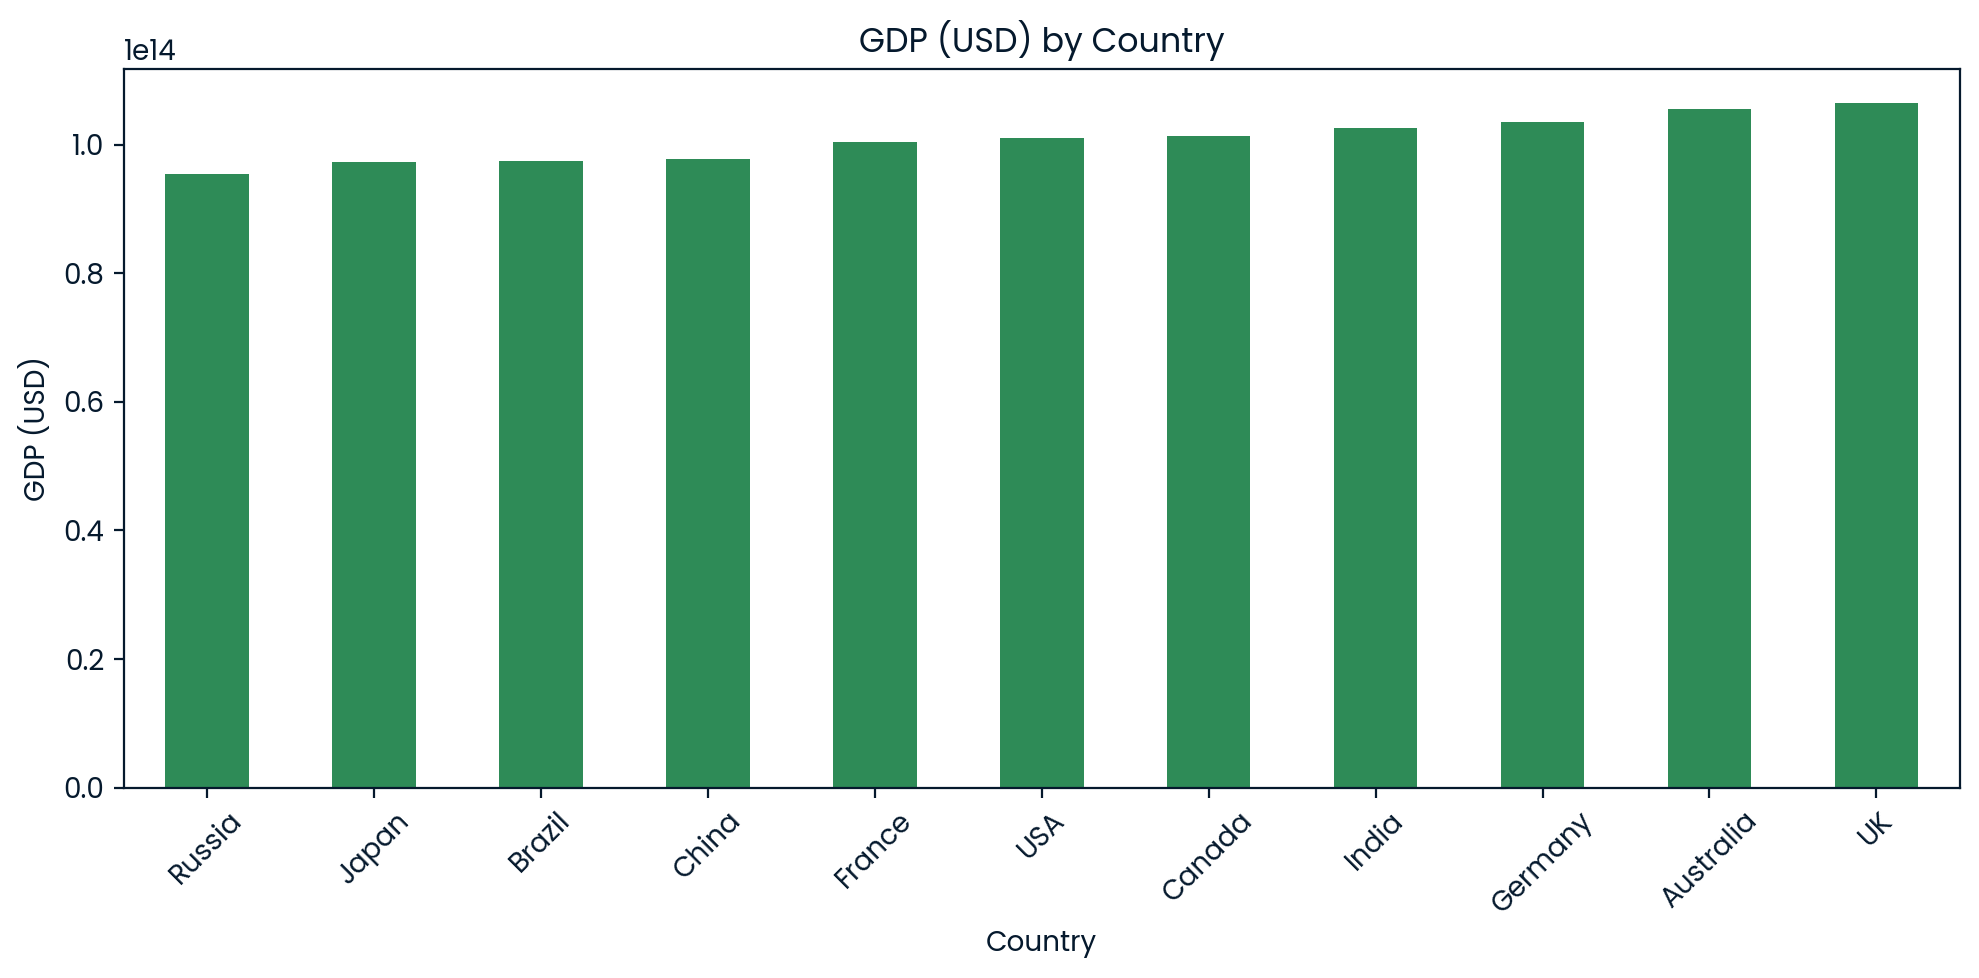

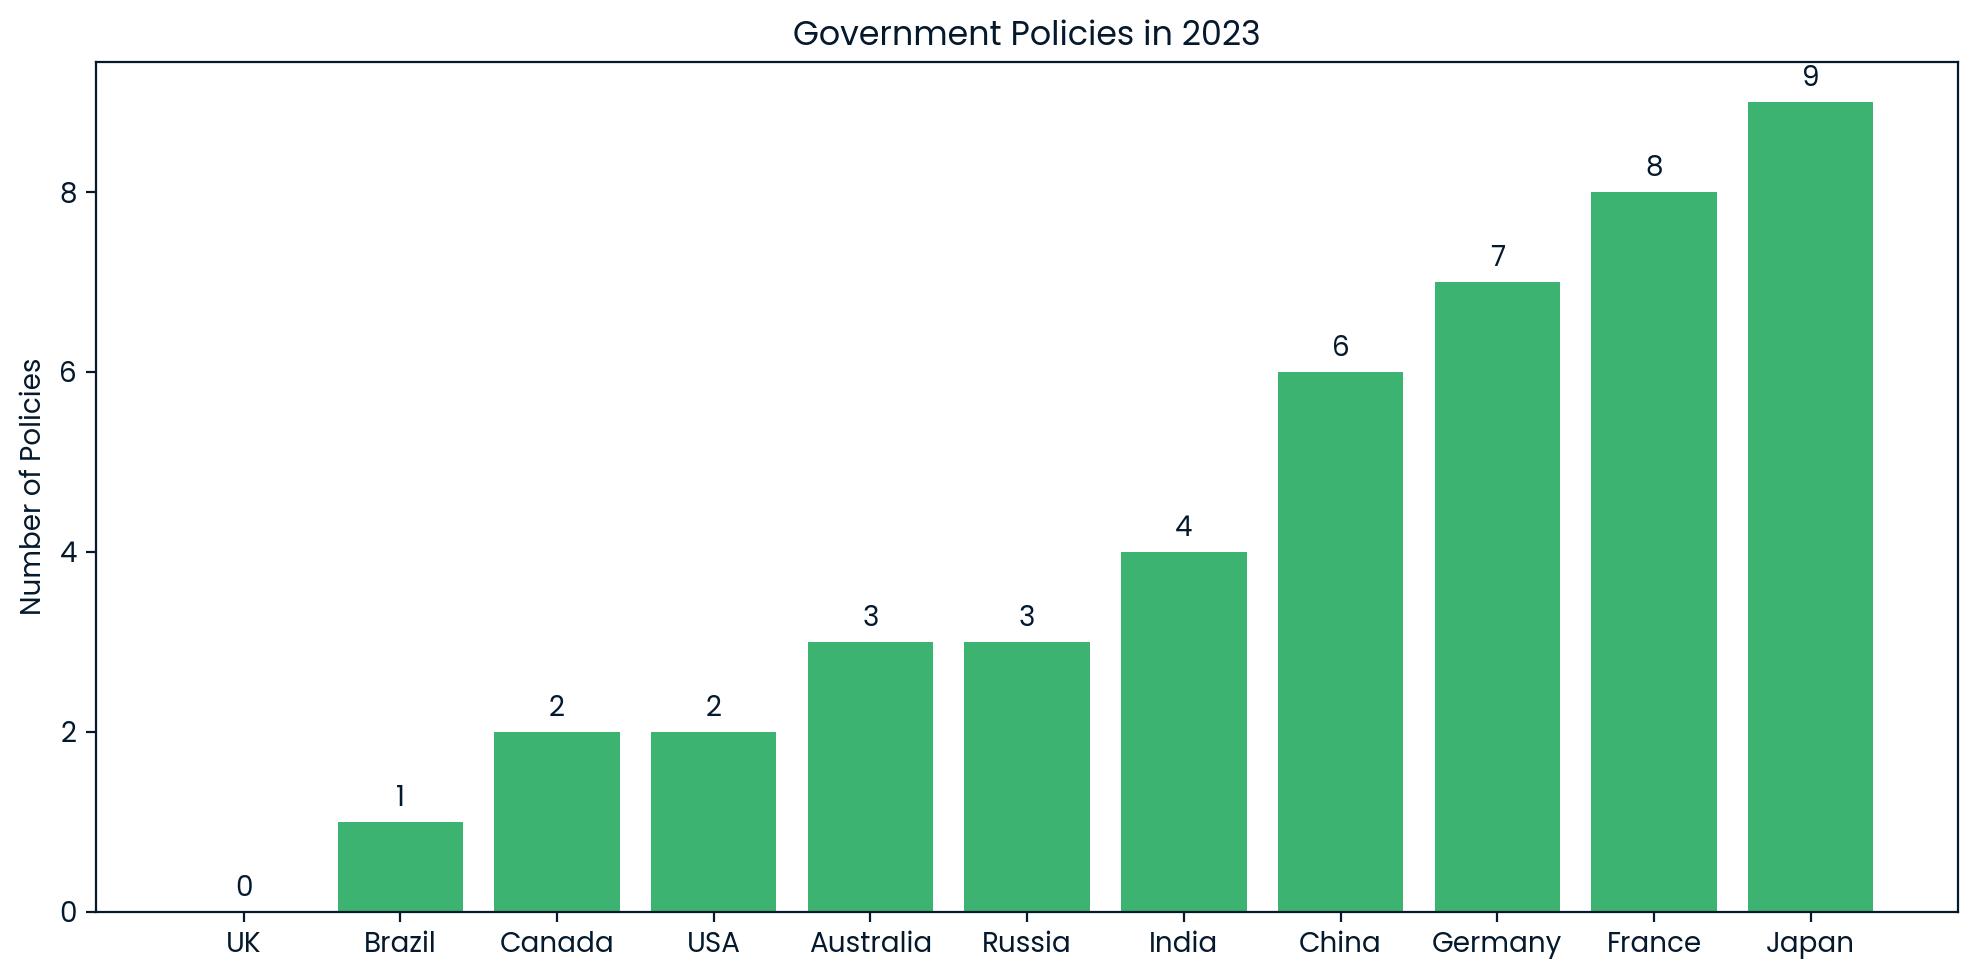

In [32]:
# Group by 'Country' and average the 'GDP'
df_gdp = df.groupby('Country', as_index=False)['GDP'].mean()
df_gdp = df_gdp.sort_values('GDP', ascending=True)
# Display the resulting DataFrame
pd.DataFrame(df_gdp)

# Set up the plot
ax = df_gdp.plot(kind='bar', x='Country', y='GDP', figsize=(10, 5), legend=False, color='seagreen')

# Customize the plot
plt.ylabel('GDP (USD)')
plt.title('GDP (USD) by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##########################################################
# Government policies in 2023
#Focus on the last year dated: 2023
df_2023 = df[df["Year"] == 2023]

# Group by 'Country' and sum the 'Government_Policies'
df_pol = df_2023.groupby('Country', as_index=False)['Government_Policies'].sum()
df_pol = df_pol.sort_values('Government_Policies', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_pol)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_pol['Country'], df_pol['Government_Policies'], color='mediumseagreen')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.title('Government Policies in 2023')
plt.ylabel('Number of Policies')
plt.tight_layout()
plt.show()

The UK appears to have minimal supportive policies yet maintains high renewable efficiency, possibly due to strong regulatory quality and governance. Meanwhile, Japan has extensive policies but does not translate this into higher efficiency, indicating policy implementation gaps.

## 4. Social & Governance

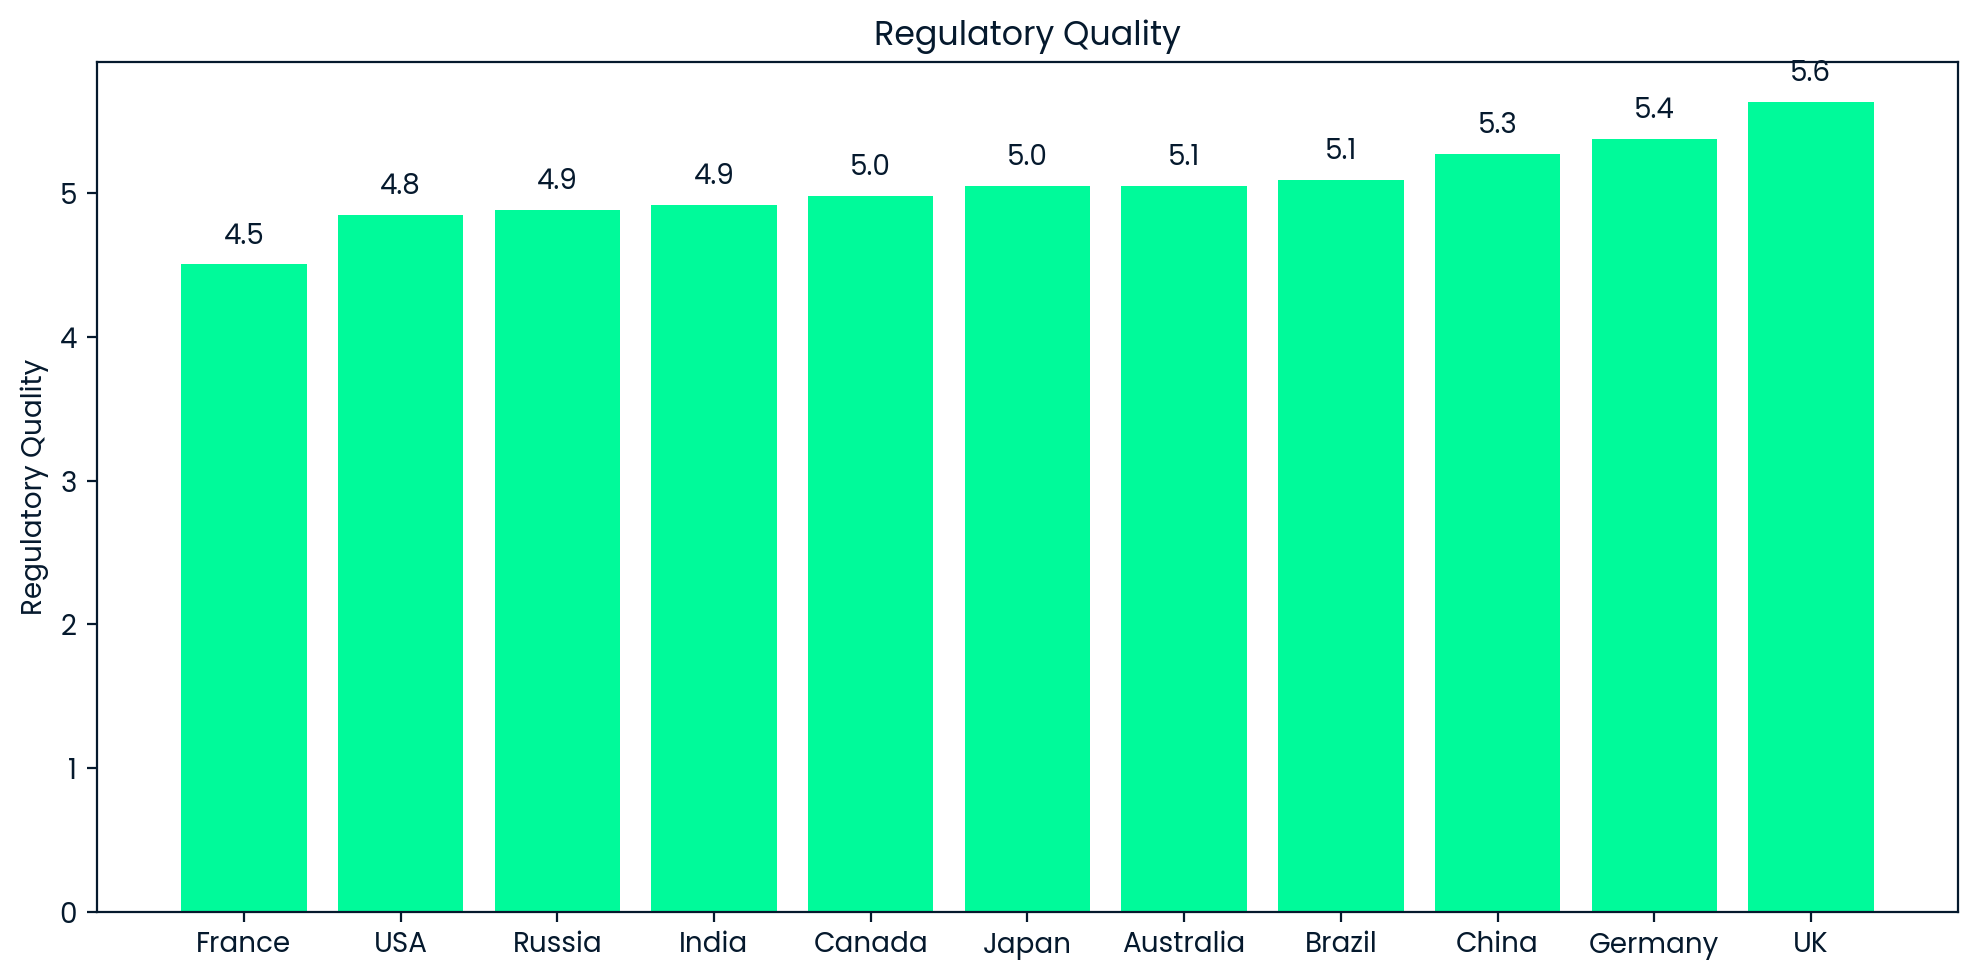

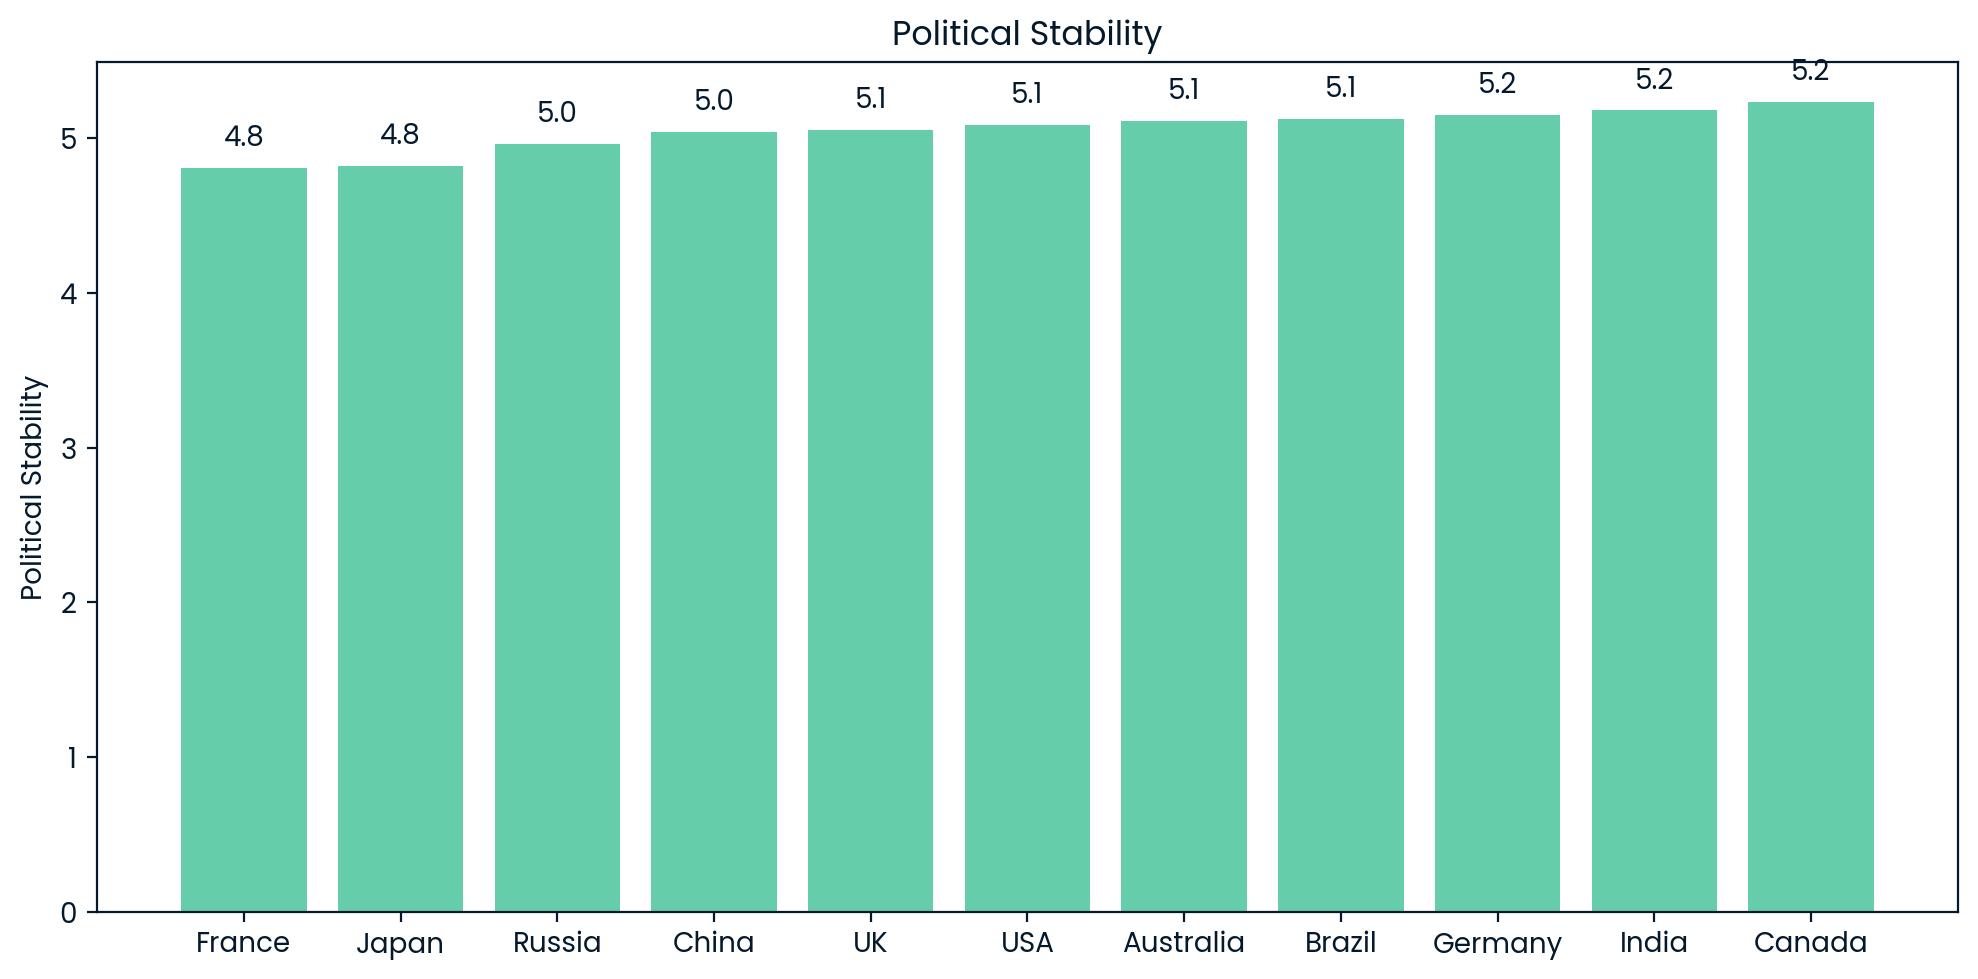

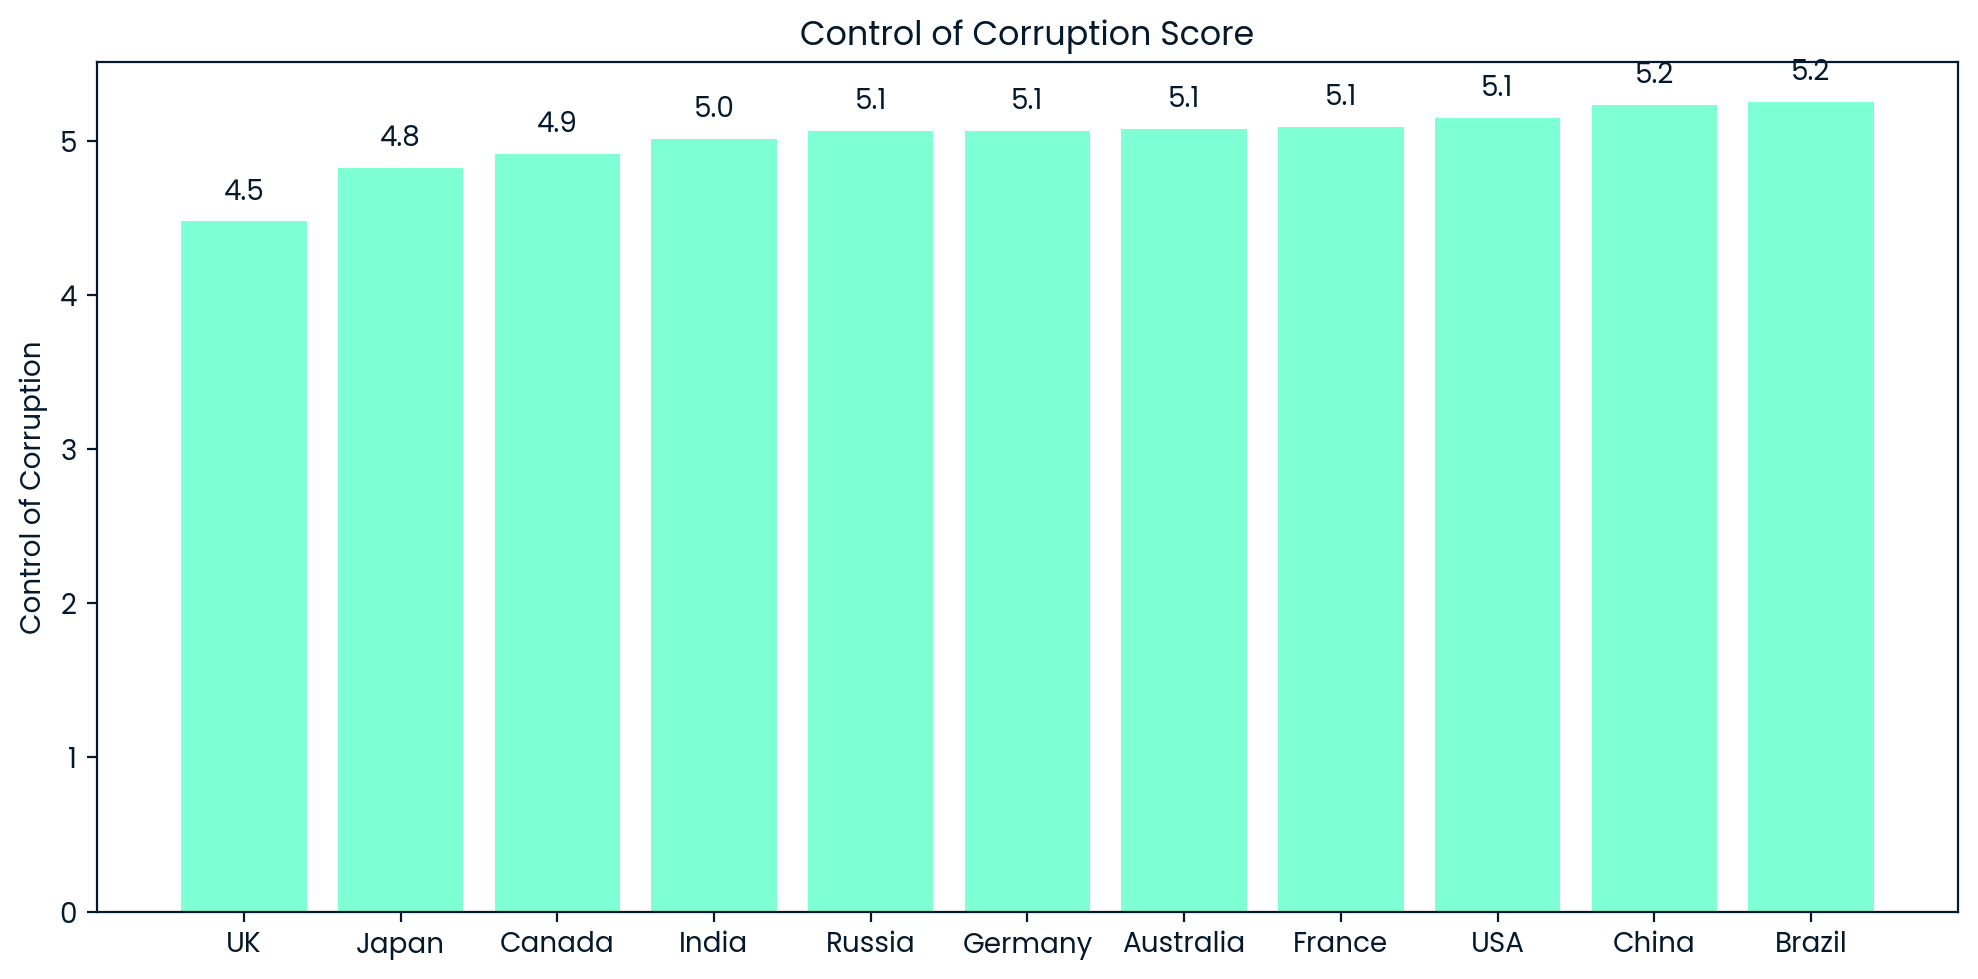

In [33]:
# Group by 'Country' and average the 'Regulatory_Quality'
df_reg = df.groupby('Country', as_index=False)['Regulatory_Quality'].mean()
df_reg = df_reg.sort_values('Regulatory_Quality', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_reg)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_reg['Country'], df_reg['Regulatory_Quality'], color='mediumspringgreen')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Regulatory Quality')
plt.ylabel('Regulatory Quality')
plt.tight_layout()
plt.show()

##########################################################
# Group by 'Country' and average the 'Political_Stability'
df_polstab = df.groupby('Country', as_index=False)['Political_Stability'].mean()
df_polstab = df_polstab.sort_values('Political_Stability', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_polstab)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_polstab['Country'], df_polstab['Political_Stability'], color='mediumaquamarine')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Political Stability')
plt.ylabel('Political Stability')
plt.tight_layout()
plt.show()

########################################################
# Group by 'Country' and average the 'Control_of_Corruption'
df_corr = df.groupby('Country', as_index=False)['Control_of_Corruption'].mean()
df_corr = df_corr.sort_values('Control_of_Corruption', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_corr)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_corr['Country'], df_corr['Control_of_Corruption'], color='aquamarine')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Control of Corruption Score')
plt.ylabel('Control of Corruption')
plt.tight_layout()
plt.show()

################################################3

UK shows its efficiency by ranking first in regulatory quality of renewables, while France ranks lowest in both regulatory quality and political stability. However, as seen in the correlation heatmap below, these factors don't seem to be directly correlated.

Control of Corruption also does not relate to efficiency of renewables since UK is ranked last in that chart.

## 5. Environment and Resources

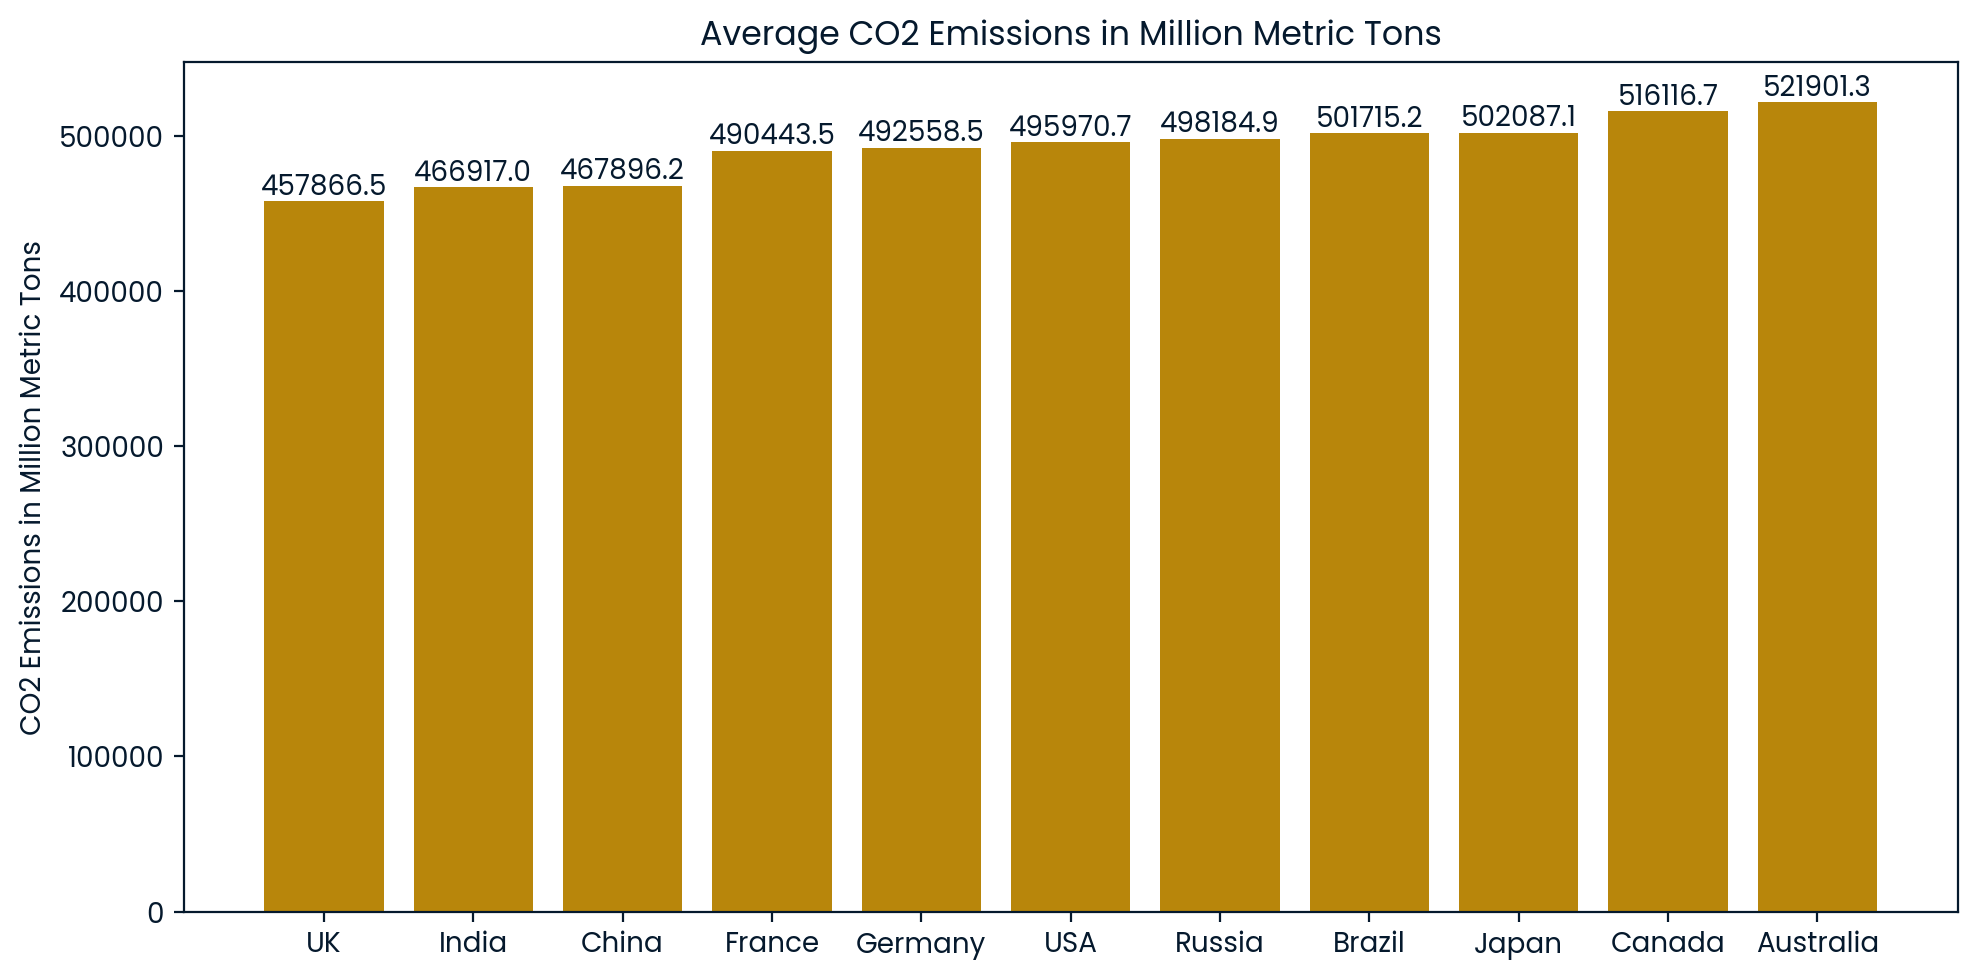

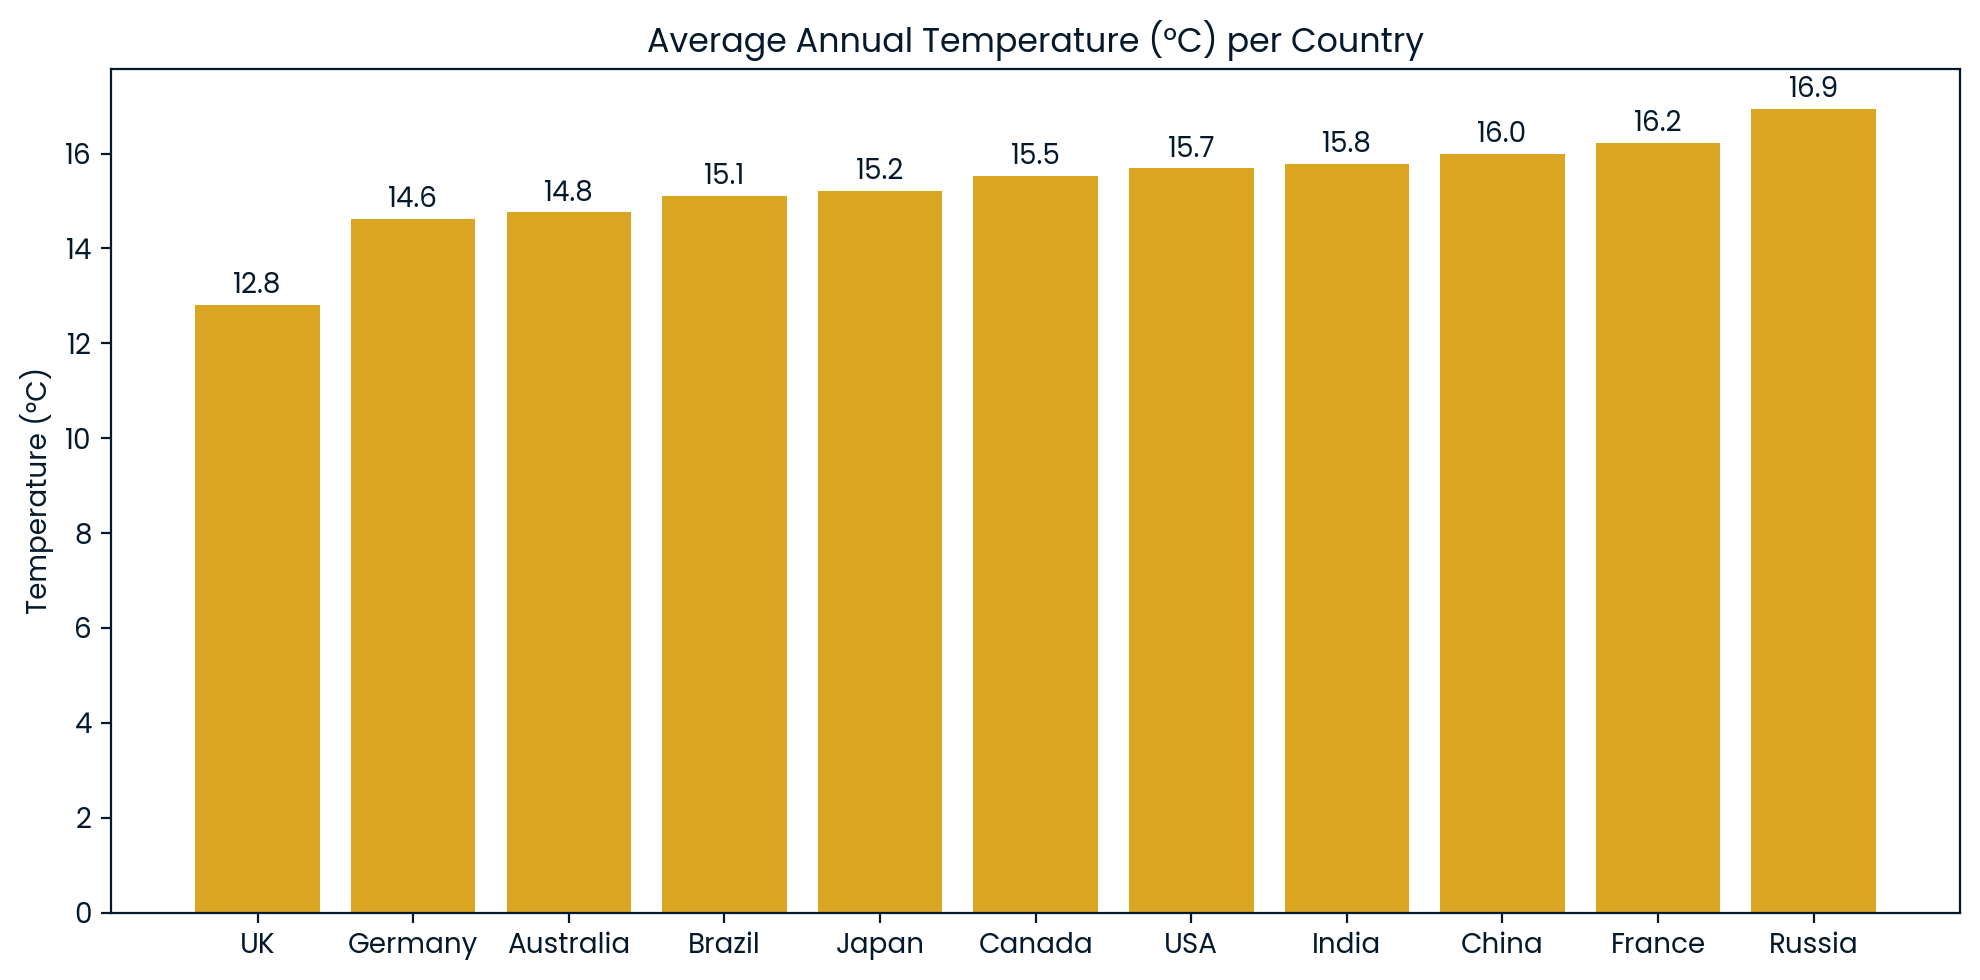

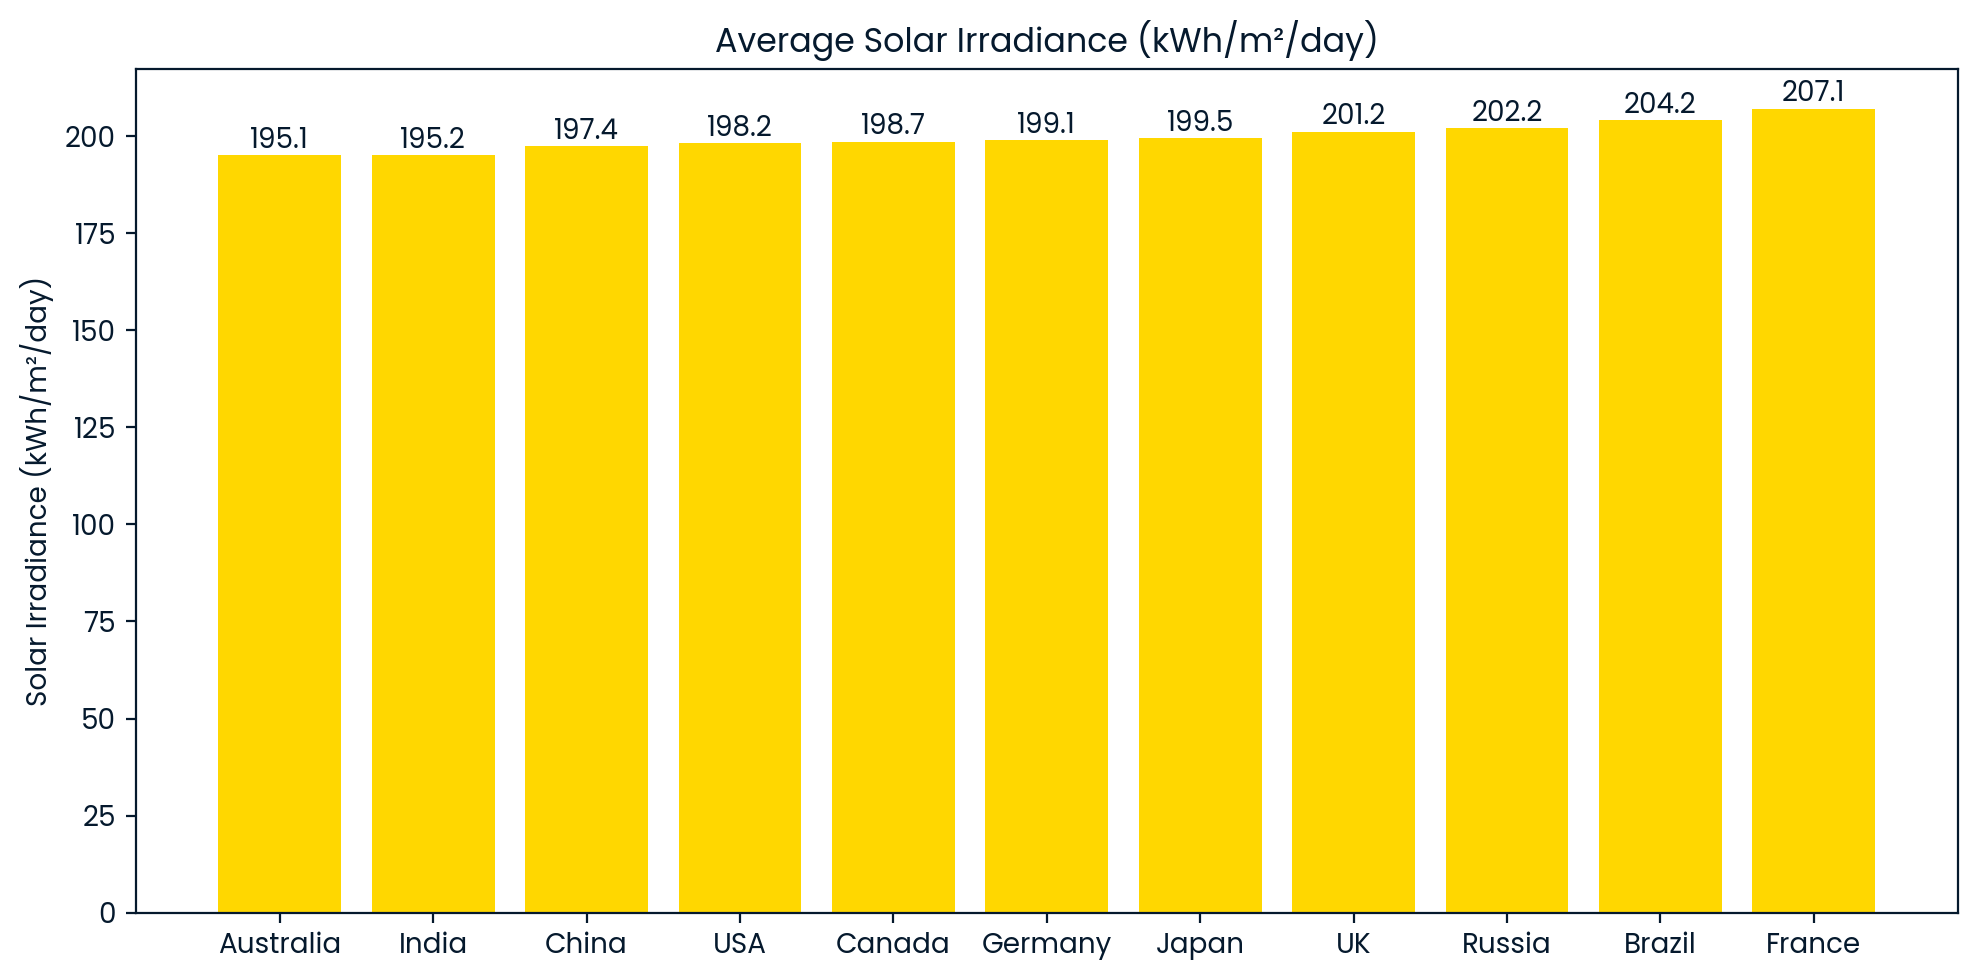

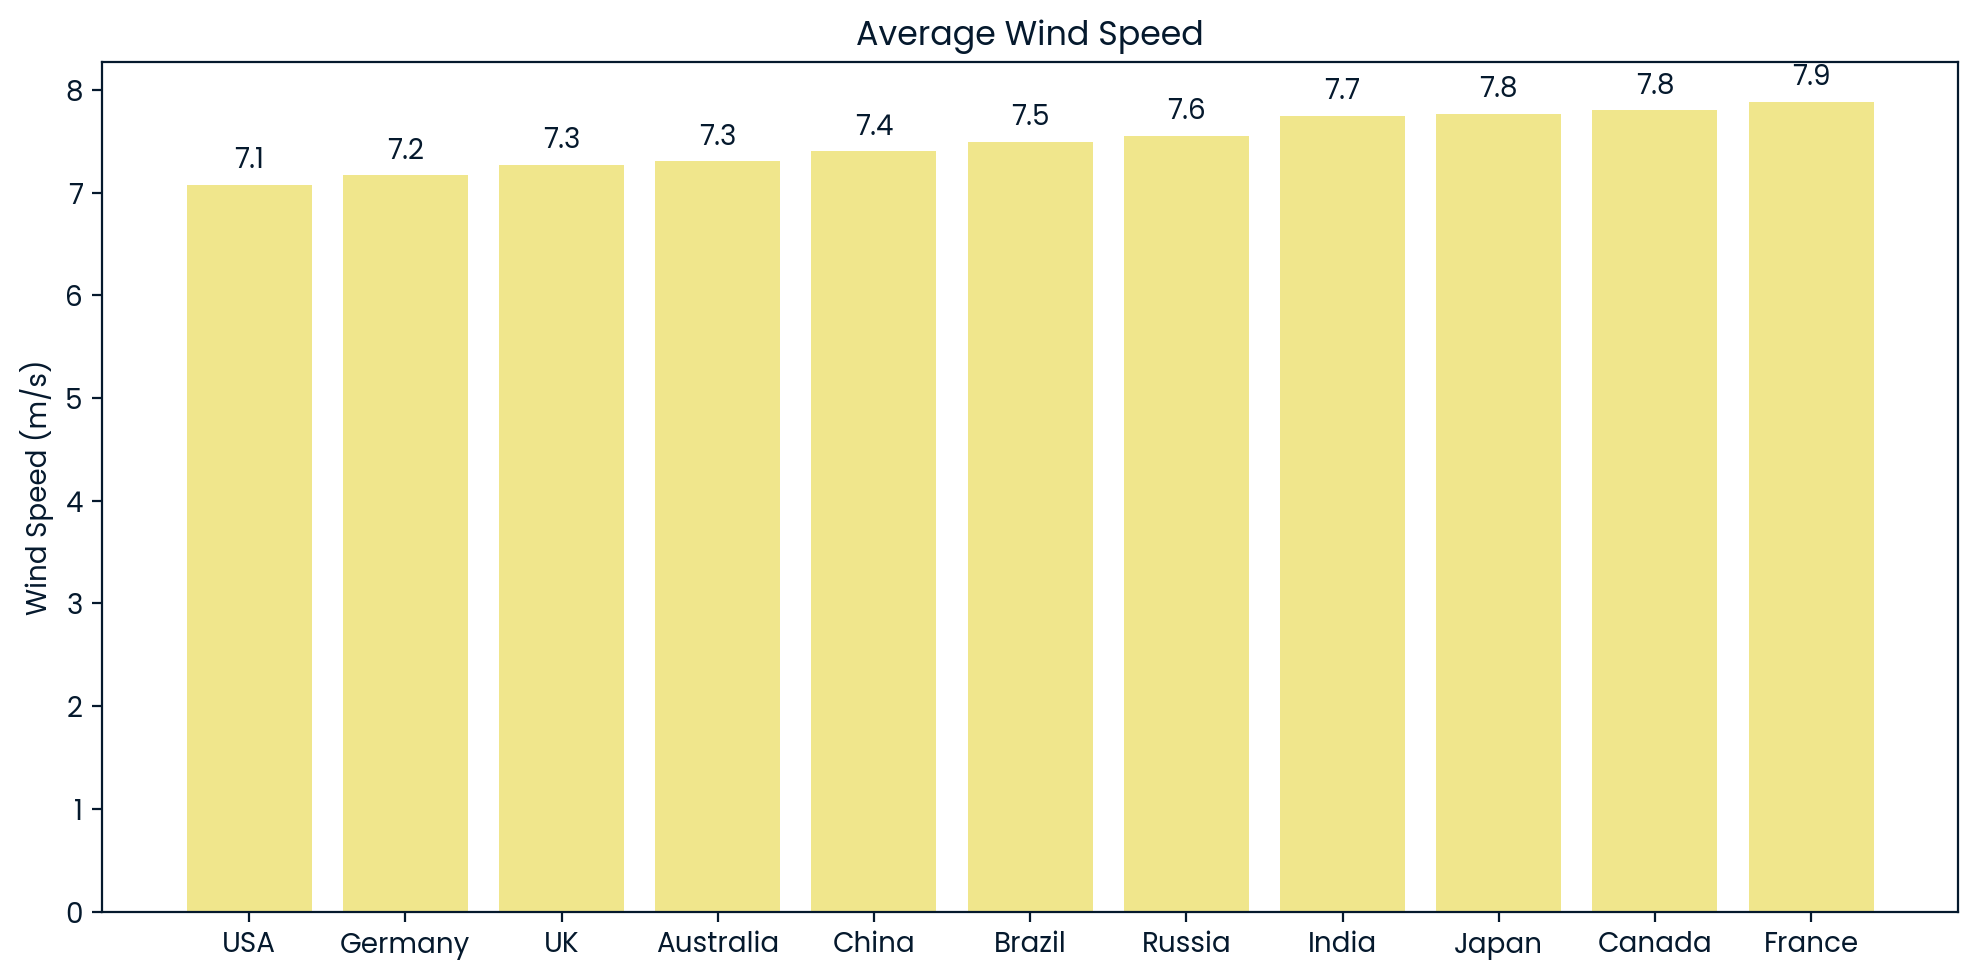

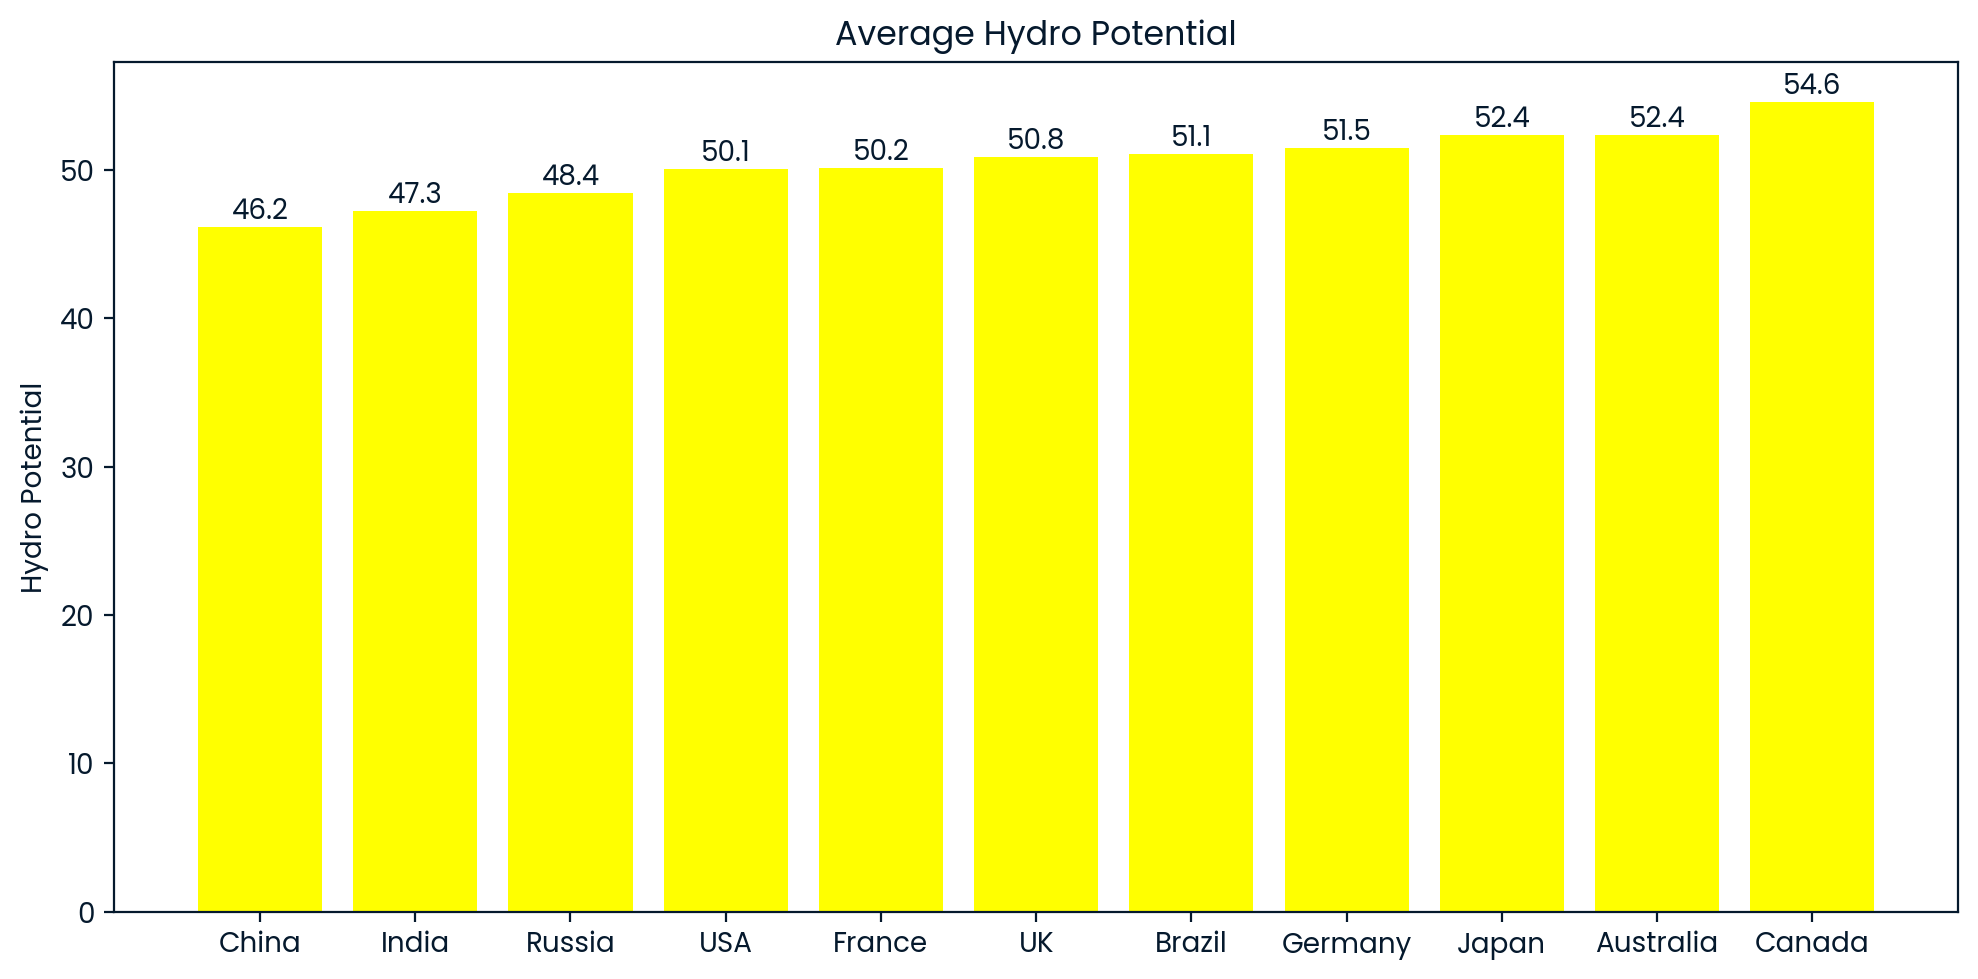

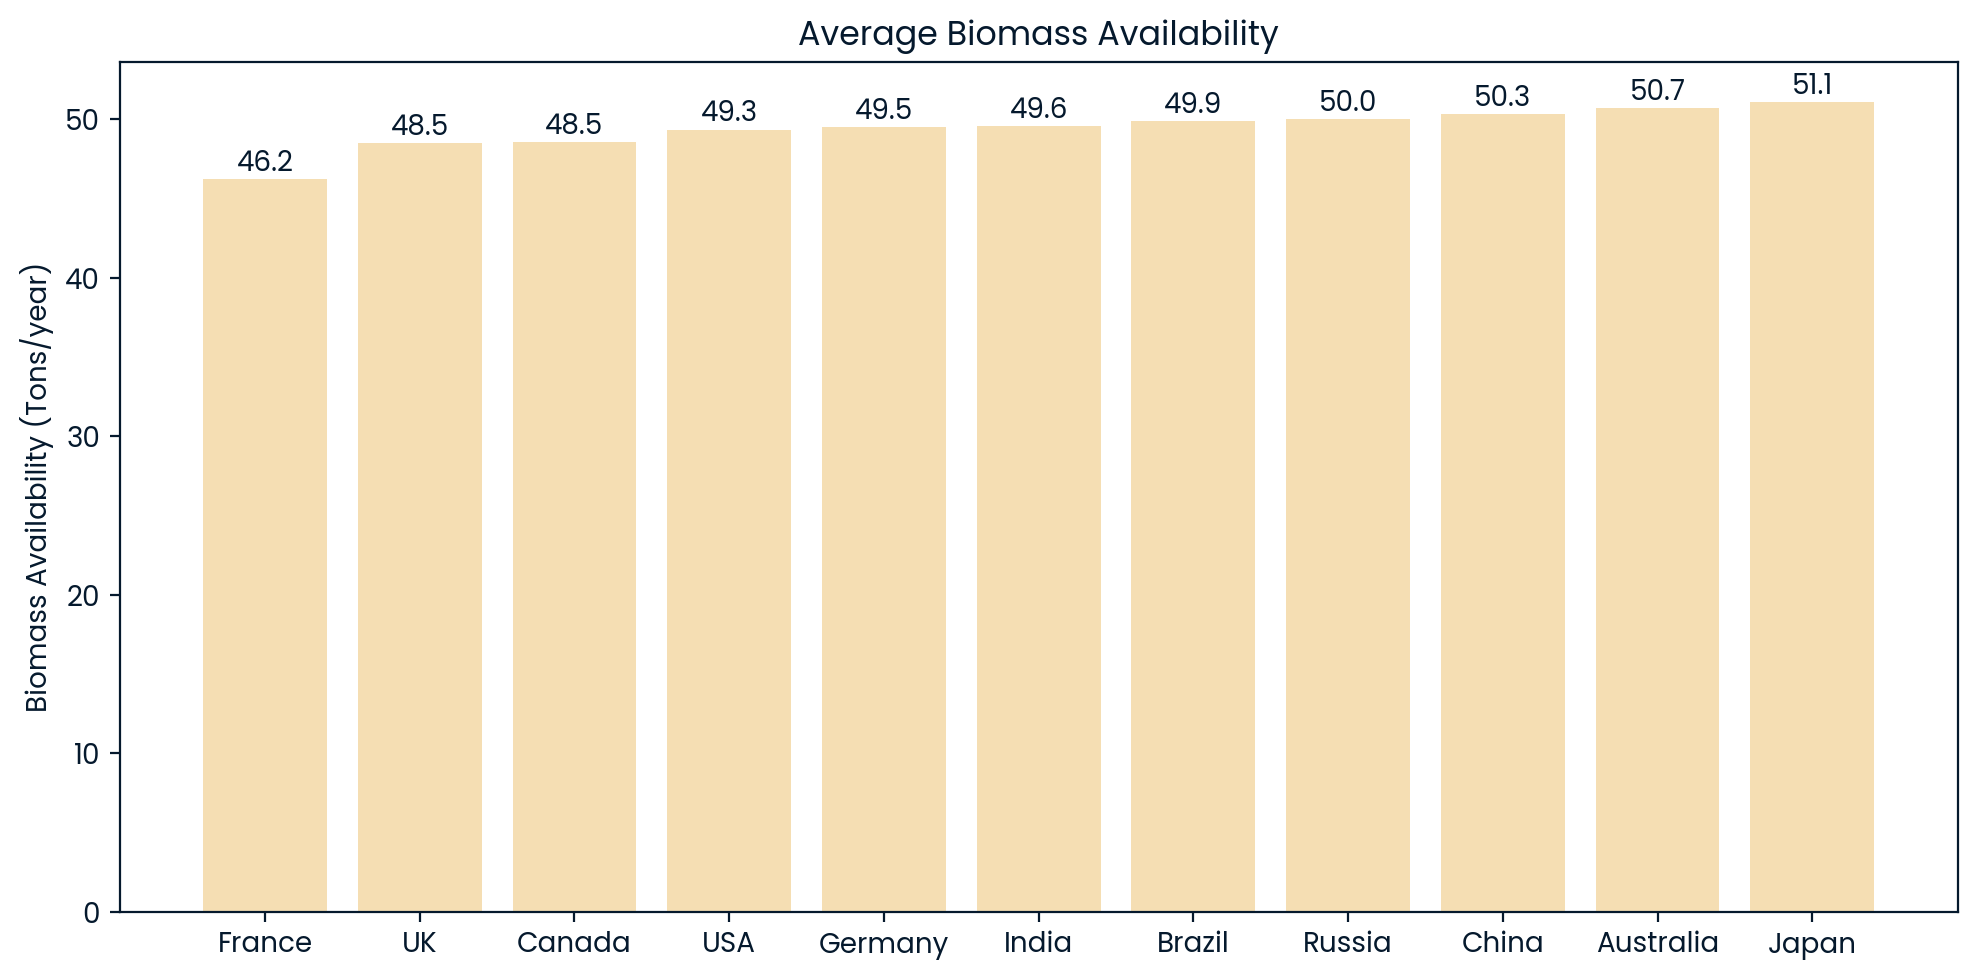

In [35]:
# Group by 'Country' and average the 'CO2_Emissions	'
df_co2 = df.groupby('Country', as_index=False)['CO2_Emissions'].mean()
df_co2 = df_co2.sort_values('CO2_Emissions', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_co2)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_co2['Country'], df_co2['CO2_Emissions'], color='darkgoldenrod')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Average CO2 Emissions in Million Metric Tons')
plt.ylabel('CO2 Emissions in Million Metric Tons')
plt.tight_layout()
plt.show()

###########################################################
# Group by 'Country' and average the 'Average_Annual_Temperature'
df_temp = df.groupby('Country', as_index=False)['Average_Annual_Temperature'].mean()
df_temp = df_temp.sort_values('Average_Annual_Temperature', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_temp)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_temp['Country'], df_temp['Average_Annual_Temperature'], color='goldenrod')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Annual Temperature (°C) per Country')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

#######################################################
# Group by 'Country' and average the 'Solar_Irradiance'
df_sol = df.groupby('Country', as_index=False)['Solar_Irradiance'].mean()
df_sol = df_sol.sort_values('Solar_Irradiance', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_sol)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_sol['Country'], df_sol['Solar_Irradiance'], color='gold')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Solar Irradiance (kWh/m²/day)')
plt.ylabel('Solar Irradiance (kWh/m²/day)')
plt.tight_layout()
plt.show()

#######################################################
# Group by 'Country' and average the 'Wind_Speed'
df_wind = df.groupby('Country', as_index=False)['Wind_Speed'].mean()
df_wind = df_wind.sort_values('Wind_Speed', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_wind)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_wind['Country'], df_wind['Wind_Speed'], color='khaki')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.show()

########################################################
# Group by 'Country' and average the 'Hydro_Potential'
df_hydro = df.groupby('Country', as_index=False)['Hydro_Potential'].mean()
df_hydro = df_hydro.sort_values('Hydro_Potential', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_hydro)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_hydro['Country'], df_hydro['Hydro_Potential'], color='yellow')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Hydro Potential')
plt.ylabel('Hydro Potential')
plt.tight_layout()
plt.show()

#######################################################
# Group by 'Country' and average the 'Biomass_Availability'
df_bio = df.groupby('Country', as_index=False)['Biomass_Availability'].mean()
df_bio = df_bio.sort_values('Biomass_Availability', ascending=True)

# Display the resulting DataFrame
pd.DataFrame(df_bio)

plt.figure(figsize=(10, 5))

bars = plt.bar(df_bio['Country'], df_bio['Biomass_Availability'], color='wheat')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Biomass Availability')
plt.ylabel('Biomass Availability (Tons/year)')
plt.tight_layout()
plt.show()

Australia shows the highest CO₂ emissions, likely due to inefficiencies in renewable energy use. The UK exhibits the lowest emissions, correlating with its high renewable integration.

Countries relying on hydro (Brazil, Canada, Germany) benefit from abundant water resources, aligning production with resource availability. China and India mainly use wind energy, likely because they have ample supply. France and the UK rely on biomass, even though they have the lowest biomass availability among the countries. Japan made a sensible choice by using both biomass and wind energy, and finally, Russia and the USA also made a smart move by utilizing solar energy.

# Correlation Heatmap of All Factors

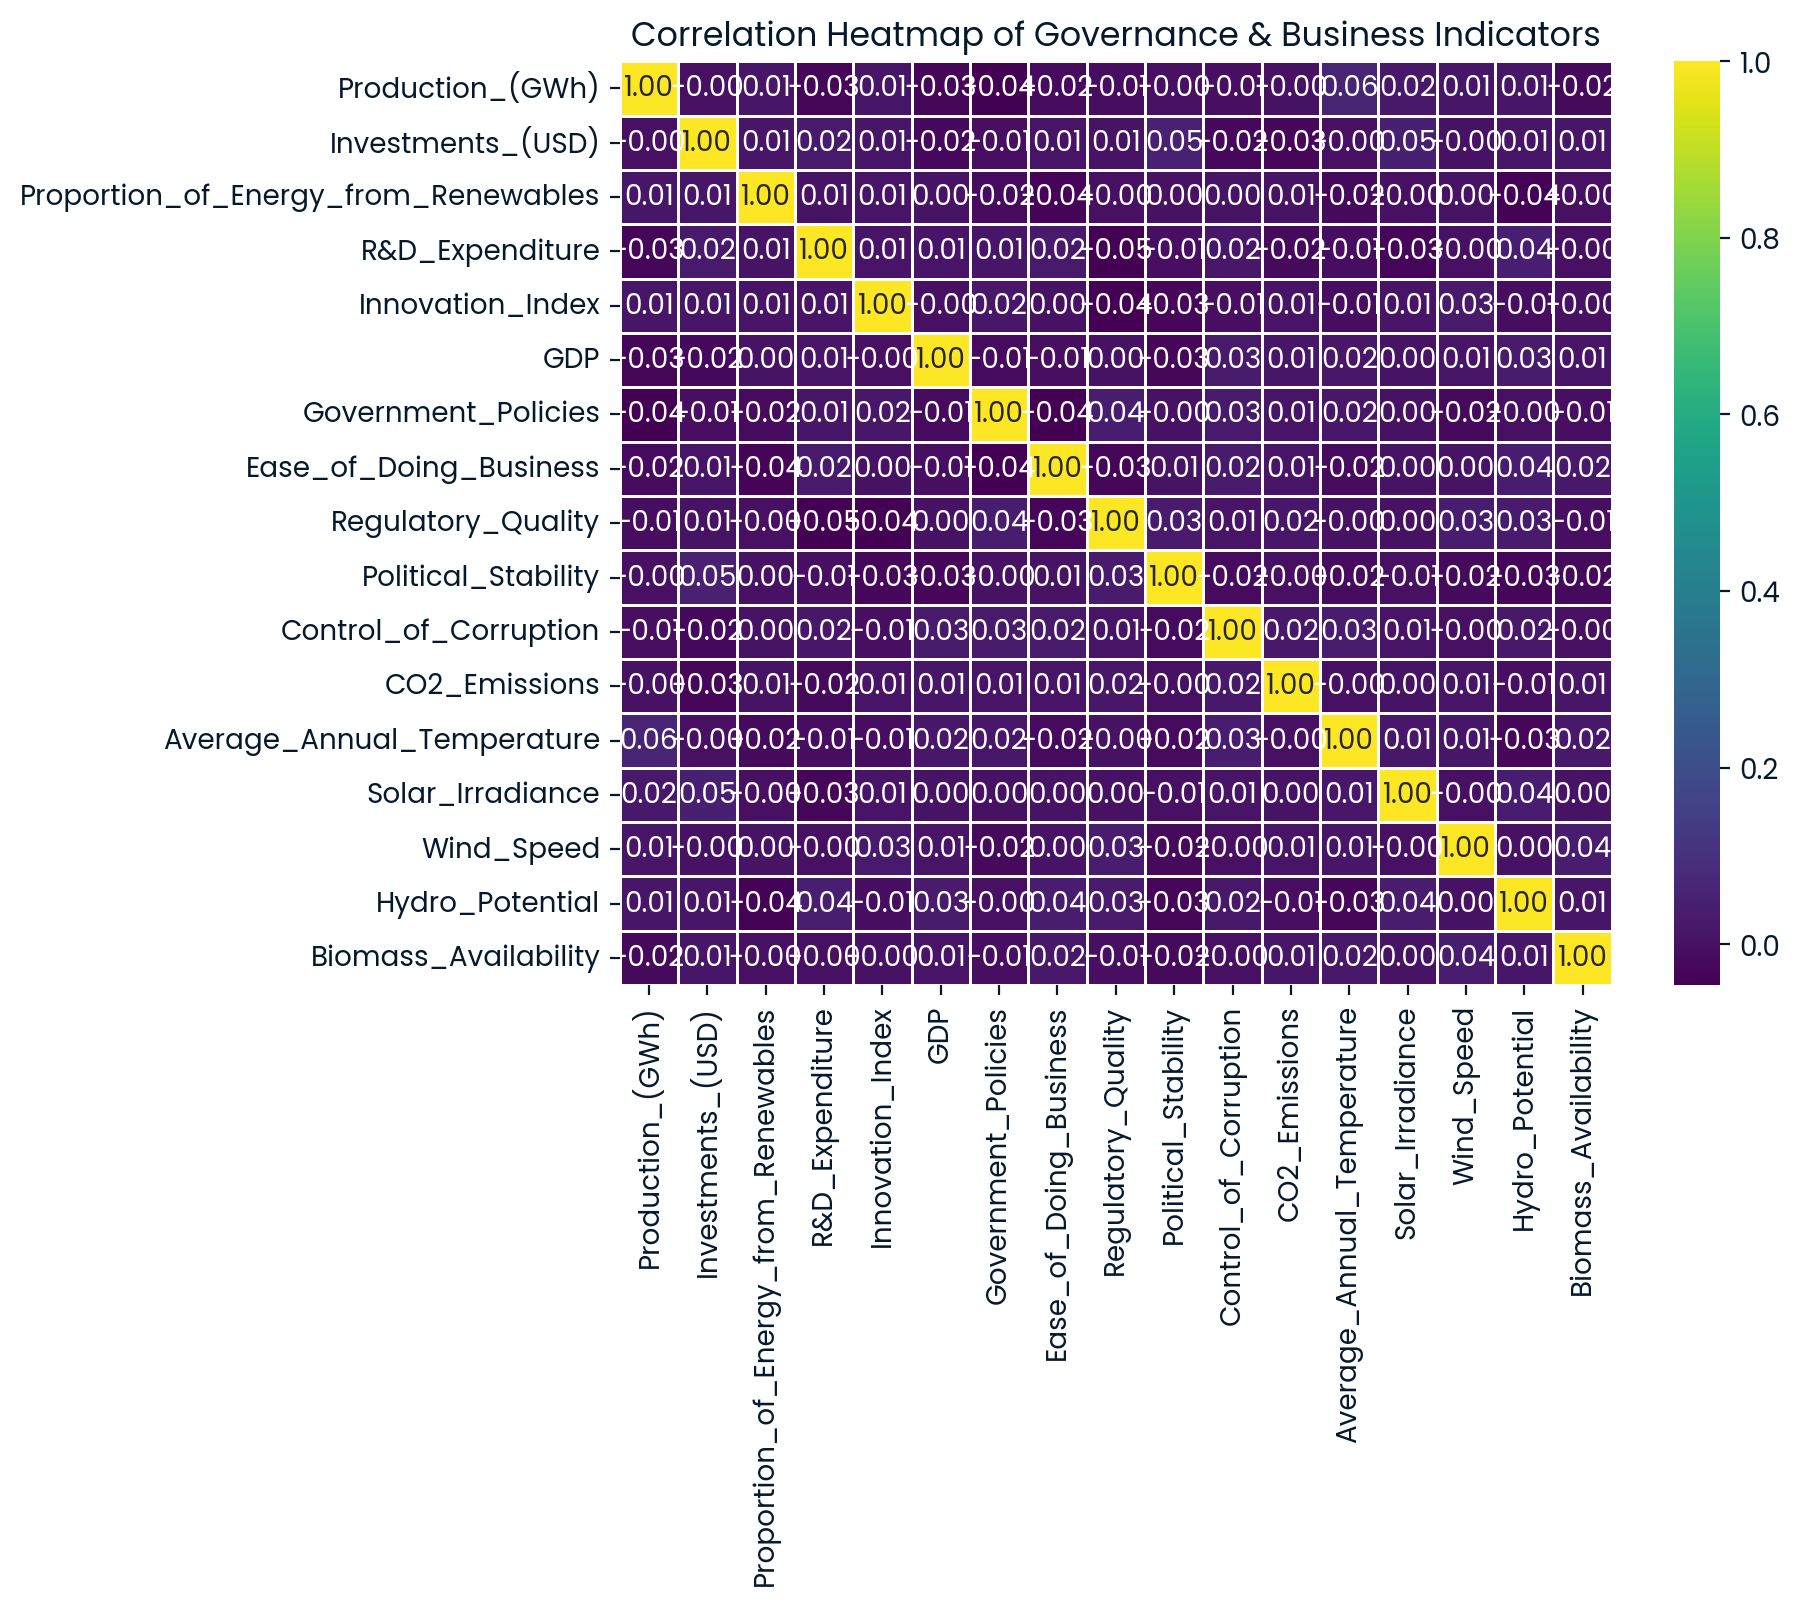

In [29]:
# Select the relevant columns
cols = ['Production_(GWh)','Investments_(USD)','Proportion_of_Energy_from_Renewables','R&D_Expenditure','Innovation_Index','GDP','Government_Policies','Ease_of_Doing_Business', 'Regulatory_Quality', 'Political_Stability', 'Control_of_Corruption', 'CO2_Emissions','Average_Annual_Temperature','Solar_Irradiance','Wind_Speed','Hydro_Potential','Biomass_Availability']
df_subset = df[cols]

# Compute correlation matrix
corr_matrix = df_subset.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Governance & Business Indicators')
plt.show()

There is no direct correlation between factors and renewable energy efficiency.

# 6. Conclusion

The UK demonstrates high efficiency, with a significant share of renewables in its energy mix and excellent regulatory quality, despite low R&D spending. China stands out as efficient, producing the highest renewable energy output relative to its investment. 

Economic investments alone do not guarantee high production, efficiency depends on how effectively resources are utilized, technological innovation, and policy implementation. The UK’s high efficiency despite minimal R&D spending highlights the importance of regulatory quality and governance. Furthermore, Australia’s high emissions and low efficiency suggest that investments may not be translating into effective renewable energy use. Resource availability significantly influences regional energy strategies, and policy support, while beneficial, does not necessarily correlate directly with efficiency.